# **Proyecto Properati** por Fernando Acosta

El proyecto **PROPERATI** consiste en el estudio de un dataset que contiene información sobre propiedades en venta de Argentina, más especificamente dentro de Capital Federal y el Gran Buenos Aires entre los años 2019 y 2020.

Properati es una plataforma movil y online para el mercado de bienes raices en Latinoaméricais, parte del grupo OLX.

El dataset fue obtenido en formato csv de: https://www.kaggle.com/datasets/andreavsquezlpez/properati-argentina-house-sale 

Dentro de las variables contenidas en las columnas se encuentran: 
- **start_date, end_date, created_on**: fechas de creación (duplicado) y finalización de la publicación
- **lat, lon**: coordenadas de la ubicación de la propiedad
- **l1, l2, l3**: país, provincia y barrio donde se haya ubicada la propiedad respectivamente
- **rooms**: cantidad total de habitaciones en la propiedad
- **bedrooms**: cantidad de dormitorios en la propiedad
- **bathrooms**: cantidad de baños en la propiedad
- **surface_covered** (superficie cubierta): sumatoria de las superficies edificadas en cada planta (si la cantidad de plantas es mayor a 1) medida en metros cuadrados (m2)
- **surface_total**: sumatoria de superficie cubierta y no cubierta medida en metros cuadrados (m2)
- **price**: precio de la propiedad
- **currency**: moneda en la que se encuentra valuada la propiedad
- **title**: título de la publicación
- **description**: breve descripción de la propiedad ofrecida
- **property_type**: tipo de propiedad
- **operation_type**: tipo de operación, que tendrá un unico valor "venta" 

## Objetivos del proyecto

En un contexto economicamente inestable, en el que el mercado inmobiliario se encuentra sujeto a gran incertidumbre y en el que el proceso de tasación es sumamente dificultoso y, en ciertos momentos subjetivo, a través del presente trabajo **se buscará dotar a las inmobilirias de una herramienta capaz de facilitar el proceso de fijar un PRECIO** a una determinada propiedad. Esto se realizará mediante un modelo de Machine Learning, en el que, teniendo datos especificos sobre la propiedad a tasar, se podrá predecir el precio de venta.

## Desarrollo del proyecto

El proyecto constará de tres partes:

#### 1. Análisis exploratorio de datos.
En esta etapa se buscará dar respuestas a preguntas como:
- ¿Qué tamaño tiene el dataset? ¿Cuántas instancias y cuántas columnas?
- ¿Cuántos valores faltantes hay en cada columna?¿Como serán tratados?
- ¿Cómo es la distribución de cada variable?
- ¿Cómo se relacionan las variables entre sí? 
- ¿Cómo están correlacionadas las variables numéricas?
- ¿Tenemos valores extremos? ¿Que porcentaje del dataset ocupan? ¿Afectan el comportamiento del mismo? ¿Su aparición tienen algún tipo de lógica? ¿Como serán tratados?
- ¿Como se puede visualizar estas cuestiones de manera gráfica?
- ¿Que variables permitirán la mejor performance de nuestro modelo?

#### 2. Modelos de Machine Learning
Debido a la naturaleza de nuestro problema a resolver y por ser de tipo numérica la variable a predecir, se utilizará un modelo de **Aprendizaje Supervisado de Regresión**.
Por esto, la etapa se desarrollará de la siguiente manera:
- Se elegirá una métrica apropiada para evaluar los resultados de los modelos.
- Se seleccionarán las variables predictoras (X) y la variable a predecir (y).
- Se realizará un Train/Test split de los datos.
- Se va a generar un modelo benchmark y evaluarlo.
- Se entrenará un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
- Evaluación de los modelos obtenidos. Para ello, se evaluará la métrica elegida en el conjunto de Test y en el conjunto de Train. También, se realizarán gráficos de valores reales vs. valores predichos.

#### 3. Optimización de parámetros y elección de modelo.
Por último, se realizará una optimización de parámetros del modelo que arroje los mejores resultados de base, luego se hará la evaluación y correspondiente interpretación de los resultados obtenidos, y se cerrará el trabajo con una conclusión.

In [1]:
# importan las librerias y el dataset a utilizar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.ticker import ScalarFormatter

#cargamos el dataset
properati = pd.read_csv('C:/Users/ferna/data.csv')

# función creada para traer los NA's
def get_na(df):
    qsna=df.shape[0]-df.isnull().sum(axis=0)
    qna=df.isnull().sum(axis=0)
    ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
    aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
    na=pd.DataFrame(data=aux)
    return na.sort_values(by='Na en %',ascending=False)

## 1. Análisis Exploratorio de Datos y Data wrangling

Empezamos con una visualización general del dataset: las cinco primeras y últimas filas, cantidad de columnas y filas y nombre de columnas

In [2]:
# Vemos las primeras 5 filas
properati.head()

start_date    end_date  created_on        lat        lon         l1  \
0  2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
1  2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   
2  2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   
3  2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   
4  2019-10-17  2020-03-11  2019-10-17 -34.914194 -57.938219  Argentina   

                       l2             l3  rooms  bedrooms  bathrooms  \
0         Capital Federal  San Cristobal    7.0       7.0        2.0   
1         Capital Federal          Boedo    2.0       1.0        2.0   
2         Capital Federal        Palermo    2.0       1.0        1.0   
3         Capital Federal        Palermo    2.0       1.0        1.0   
4  Bs.As. G.B.A. Zona Sur       La Plata    2.0       1.0        1.0   

   surface_total  surface_covered     price currency  \
0          140.0            140.0  153000.0      USD   
1           70.0             58.0  159000.0      USD   
2           45.0             45.0  125000.0      USD   
3           85.0             50.0  295000.0      USD   
4           50.0             35.0   40000.0      USD   

                                               title  \
0        ***Venta semipiso centro, ideal hostel*****   
1   Espectacular PH reciclado en Boedo sin expensas.   
2  Depto.tipo casa de 2 ambientes en Venta en Pal...   
3  COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...   
4  58 entre 1 y 2  Venta de departamento en ph.1 ...   

                                         description property_type  \
0  DESCRIPCION DE LA PROPIEDAD: Departamento de 1...  Departamento   
1   PH reciclado en Boedo a una cuadra de la plaz...            PH   
2  2 ambienets amplio , excelente estado , patio ...            PH   
3  HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...            PH   
4  58 entre 1 y 2  Venta de departamento en PH. P...            PH   

  operation_type  
0          Venta  
1          Venta  
2          Venta  
3          Venta  
4          Venta

In [3]:
# Vemos las 5 ultimas filas
properati.tail()

start_date    end_date  created_on        lat        lon         l1  \
146655  2019-07-31  2019-08-13  2019-07-31 -34.816348 -58.181963  Argentina   
146656  2019-07-31  2019-08-14  2019-07-31 -34.446459 -58.937810  Argentina   
146657  2019-07-31  2019-08-14  2019-07-31 -34.444633 -58.981606  Argentina   
146658  2019-07-31  2019-08-14  2019-07-31 -34.444830 -58.981796  Argentina   
146659  2019-07-31  2019-10-12  2019-07-31 -34.444760 -58.981885  Argentina   

                              l2           l3  rooms  bedrooms  bathrooms  \
146655    Bs.As. G.B.A. Zona Sur  Berazategui    2.0       1.0        1.0   
146656  Bs.As. G.B.A. Zona Norte        Pilar    4.0       3.0        2.0   
146657  Bs.As. G.B.A. Zona Norte        Pilar    1.0       1.0        1.0   
146658  Bs.As. G.B.A. Zona Norte        Pilar    2.0       1.0        1.0   
146659  Bs.As. G.B.A. Zona Norte        Pilar    3.0       2.0        1.0   

        surface_total  surface_covered     price currency  \
146655           54.0             48.0  165000.0      USD   
146656          164.0             90.0  130000.0      USD   
146657           50.0             35.0   73000.0      USD   
146658           38.0             38.0   68000.0      USD   
146659           75.0             75.0   98000.0      USD   

                                                    title  \
146655  Departamento en Venta en Barrio Privado Barran...   
146656  Venta departamentos tres dormitorios jardín co...   
146657  Venta departamento de un ambiente Manzanares C...   
146658           Departamento en Venta. Manzanares chico.   
146659          Departamento en venta en Manzanares Chico   

                                              description property_type  \
146655  Departamento de 2 ambientesCocina con alacena ...  Departamento   
146656  Muy buen duplex a estrenar en dos plantas más ...  Departamento   
146657  En los Condominios de Campo Manzanares Chico, ...  Departamento   
146658  Broker: Maria 11Departamento de dos ambientes ...  Departamento   
146659  Departamento en el Barrio Manzanares Chico , e...  Departamento   

       operation_type  
146655          Venta  
146656          Venta  
146657          Venta  
146658          Venta  
146659          Venta

In [4]:
# Dimension del dataset
print(properati.shape)

(146660, 19)


In [5]:
# Nombre de columnas
properati.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [6]:
# Los atributos l1, l2, l3 corresponden a País, Provincia y Ciudad respectivamente. Se cambian el nombre de las columnas

properati.rename(columns={'l1':'pais',
                        'l2':'provincia', 'l3':'barrio'},
               inplace=True)

Obtenemos información del dataset: conteo de valores no nulos con el tipo de dato

In [7]:
# se comienza con la búsqueda de datos faltantes
properati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   pais             146660 non-null  object 
 6   provincia        146660 non-null  object 
 7   barrio           146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

In [8]:
# Analizamos que valores de moneda, país y tipo de operación hay
print(properati.currency.unique())
print(properati.pais.unique())
print(properati.operation_type.unique())


['USD']
['Argentina']
['Venta']


Se puede observar que tenemos propiedades solamente a la venta tasadas en moneda extranjera (dolar) y en el territorio argentino

Además se observa una diferencia de valores en la columna del conteo de los mismos, se intuye que puede resultar que esos atributos contengan valores nulos. A su vez, eliminamos las 3 columnas que tienen un solo valor para tener un dataset más limpio

In [9]:
properati = properati.drop([ 'pais', 'currency', 'operation_type'], axis=1) 

In [10]:
# cambiamos los atributos de tipo object a string para poder trabajarlos de manera adecuada
properati['property_type'] = properati['property_type'].astype('string')
properati['provincia'] = properati['provincia'].astype('string')
properati['barrio'] = properati['barrio'].astype('string')
properati['rooms'] = properati['rooms'].astype('int')

properati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   provincia        146660 non-null  string 
 6   barrio           146660 non-null  string 
 7   rooms            146660 non-null  int32  
 8   bedrooms         146660 non-null  float64
 9   bathrooms        140703 non-null  float64
 10  surface_total    126133 non-null  float64
 11  surface_covered  125046 non-null  float64
 12  price            146660 non-null  float64
 13  title            146660 non-null  object 
 14  description      146660 non-null  object 
 15  property_type    146660 non-null  string 
dtypes: float64(7), int32(1), object(5), st

In [11]:
# Hago una nube de palabras para ver si las descripciones y títulos me dan información útil, aprovecho a sacar palabras que sé que van a aparecer y no me sirven
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(titulo for titulo in properati.title)
stopwords = set(STOPWORDS)
stopwords.update(["venta", "de", "propiedad", "terreno", "barrio","la","departamento","con","casa","Capital federal","en","capital","federal","ambiente","ambientes"])

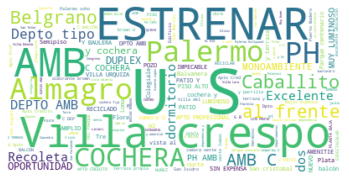

In [12]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
textDesc = " ".join(desc for desc in properati.description)

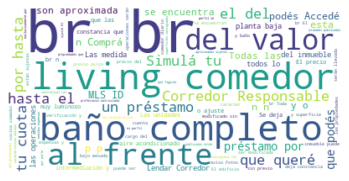

In [14]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(textDesc)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

No parece tener información útil para el modelo por lo que decidimos eliminar esas columnas

## 1.1 Análisis Univariado

#### Conteo de valores por tipo de propiedad

In [15]:
properati.property_type.unique()

<StringArray>
[   'Departamento',              'PH',            'Casa',            'Lote',
   'Casa de campo',         'Oficina',            'Otro', 'Local comercial',
         'Cochera',        'Depósito']
Length: 10, dtype: string

In [16]:
properati.property_type.value_counts()

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: Int64

In [17]:
properati.property_type.value_counts(normalize=True).round(3)

Departamento       0.732
Casa               0.147
PH                 0.097
Lote               0.009
Oficina            0.004
Otro               0.003
Local comercial    0.002
Casa de campo      0.002
Depósito           0.002
Cochera            0.002
Name: property_type, dtype: Float64

Como se puede ver los 3 tipos de propiedades mas ofertadas son Casa, Departamento y PH. 
Debido a la predominancia de las mismas y con el fin de obtener un modelo mas preciso, se trabajará unicamente con las categorias mencionadas.

Podemos observar que el tipo de propiedad Departamento es la predominante abarcando un 75% de los datos, lo cual a futuro podría traer aparejado un problema por desbalance.

#### Conteo de Valores por Zona y Barrio


In [18]:
# Valores únicos de la columna provincia
properati.provincia.unique()

<StringArray>
[         'Capital Federal',   'Bs.As. G.B.A. Zona Sur',
 'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Oeste']
Length: 4, dtype: string

In [19]:
# Conteo de valores de la columna provincia
properati.provincia.value_counts()

Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: provincia, dtype: Int64

In [20]:
# Conteo de valores de la columna provincia expresados en porcentaje
properati.provincia.value_counts(normalize=True).round(3)

Capital Federal             0.631
Bs.As. G.B.A. Zona Norte    0.166
Bs.As. G.B.A. Zona Sur      0.117
Bs.As. G.B.A. Zona Oeste    0.086
Name: provincia, dtype: Float64

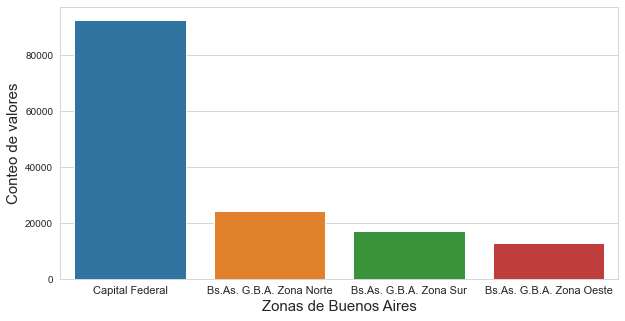

In [21]:
# Visualizamos lo anterior mediante un countplot
plt.figure(figsize = (10,5))
sns.set_style('whitegrid')
sns.countplot(data=properati, x = 'provincia',order = properati.provincia.value_counts().index)
plt.xlabel('Zonas de Buenos Aires', size = 15)
plt.ylabel('Conteo de valores', size = 15)
plt.xticks(rotation= 0, size = 11)
plt.show()

In [22]:
# Valores únicos de la columna barrio
properati.barrio.unique()

<StringArray>
[       'San Cristobal',                'Boedo',              'Palermo',
             'La Plata',         'Villa Crespo',     'Parque Patricios',
     'Villa Pueyrredón',                'Pilar',                'Tigre',
               'Abasto',               'Flores',                'Morón',
                'Nuñez',              'Almagro',             'Belgrano',
             'Floresta',             'Recoleta',            'Balvanera',
            'Caballito',            'Chacarita',            'San Telmo',
           'Colegiales',           'La Matanza',           'San Isidro',
           'San Miguel',           'Villa Luro',         'Barrio Norte',
          'Las Cañitas',          'San Nicolás',        'Villa Urquiza',
        'Vicente López',    'Parque Centenario',   'General San Martín',
  'Villa General Mitre',                'Lanús',            'Ituzaingó',
                 'Boca',                 'Once',               'Retiro',
            'Monserrat',           'A

In [23]:
# Conteo de valores de la columna barrio
properati.barrio.value_counts()

Palermo            13073
Tigre               8718
Almagro             7527
Belgrano            6935
Caballito           6650
                   ...  
Cañuelas             108
Villa Soldati         69
Villa Riachuelo       42
Marcos Paz            35
Catalinas              5
Name: barrio, Length: 89, dtype: Int64

In [24]:
# Conteo de valores de la columna barrio expresados en porcentaje
properati.barrio.value_counts(normalize=True).round(3)

Palermo            0.089
Tigre              0.059
Almagro            0.051
Belgrano           0.047
Caballito          0.045
                   ...  
Cañuelas           0.001
Villa Soldati        0.0
Villa Riachuelo      0.0
Marcos Paz           0.0
Catalinas            0.0
Name: barrio, Length: 89, dtype: Float64

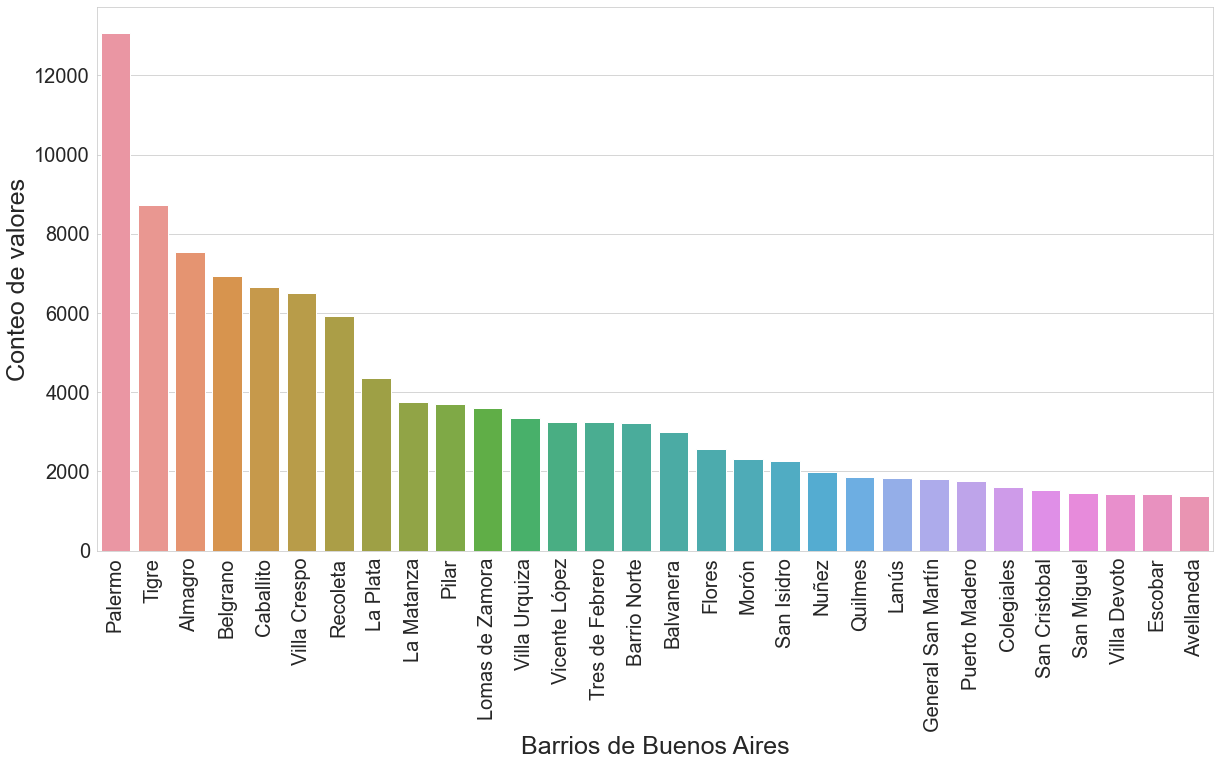

In [25]:
#Graficamos los 30 barrios con mayor frecuencia del dataset
plt.figure(figsize = (20,10))
sns.countplot(data=properati, x = 'barrio',order = properati.barrio.value_counts().iloc[:30].index)
plt.xlabel('Barrios de Buenos Aires', size = 25)
plt.ylabel('Conteo de valores', size = 25)
plt.xticks(rotation= 90, size=20)
plt.yticks(size = 20)
plt.show()

Podemos observar que no solo los datos corresponden unicamente a Argentina, sino que además abarca exclusivamente a la provincia de Buenos Aires. Teniendo la mayor incidencia en Capital Federal, especificamente en el barrio de Palermo.

Para tener una mayor coherencia a la hora de aplicar modelos de machine learning, tomamos como criterio conservar solo los registros con barrios que en total tengan 50 o más muestras, diferenciando por tipo de propiedad

#### Análisis de variables numéricas (precio, superficie total y cubierta)

In [26]:
# Se ejecuta el comando 'describe' para tener un resumen del comportamiento de las variables numéricas
properati.describe().round()

lat       lon     rooms  bedrooms  bathrooms  surface_total  \
count  136735.0  136701.0  146660.0  146660.0   140703.0       126133.0   
mean      -35.0     -58.0       3.0       2.0        2.0          217.0   
std         0.0       0.0       1.0       1.0        1.0         2038.0   
min       -35.0    -180.0       1.0       0.0        1.0           10.0   
25%       -35.0     -59.0       2.0       1.0        1.0           52.0   
50%       -35.0     -58.0       3.0       2.0        1.0           78.0   
75%       -35.0     -58.0       4.0       3.0        2.0          140.0   
max        85.0     -58.0      35.0      15.0       14.0       193549.0   

       surface_covered       price  
count         125046.0    146660.0  
mean             113.0    241221.0  
std              917.0    318519.0  
min                1.0      5500.0  
25%               47.0    111000.0  
50%               68.0    166000.0  
75%              108.0    265000.0  
max           126062.0  32434232.0

Ahora que tenemos más limpio el dataset comprobamos que la latitud y longitud tienen valores con sentido

<AxesSubplot:>

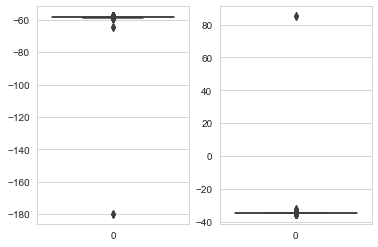

In [27]:
plt.subplot(1,2,1)
sns.boxplot(data=properati.lon)

plt.subplot(1,2,2)
sns.boxplot(data=properati.lat)

Vemos que la latitud y longitud tienen outliers pero también se ve que que dichas filas tienen valores nulos y más adelante las eliminaremos

In [28]:
properati[(properati['lat']>0)|(properati['lon']<-100)]

start_date    end_date  created_on        lat    lon  \
99242   2019-11-12  9999-12-31  2019-11-12  85.051129 -180.0   
101096  2019-11-12  9999-12-31  2019-11-12  85.051129 -180.0   

                     provincia    barrio  rooms  bedrooms  bathrooms  \
99242   Bs.As. G.B.A. Zona Sur  La Plata      1       0.0        1.0   
101096  Bs.As. G.B.A. Zona Sur   Quilmes      4       3.0        NaN   

        surface_total  surface_covered     price  \
99242             NaN              NaN   60000.0   
101096            NaN              NaN  180000.0   

                                                    title  \
99242   Departamento en Venta en La plata, La plata U$...   
101096  Casa en Venta en Quilmes oeste , Quilmes  U$S ...   

                                              description property_type  
99242   Venta de Departamento MONOAMBIENTE en la plata...  Departamento  
101096  Venta de Casa 4 AMBIENTES en QUILMES OESTE , Q...          Casa

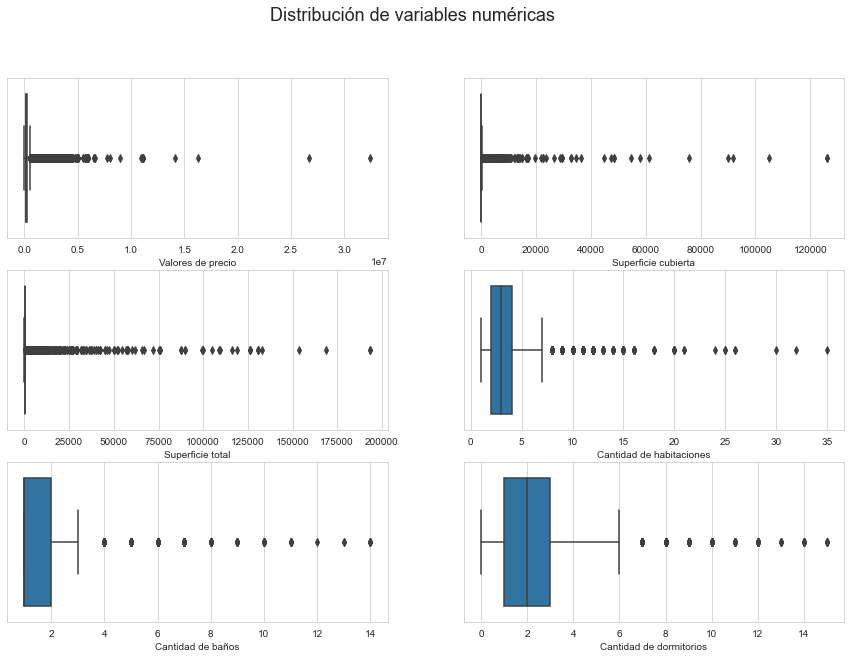

In [29]:
# Graficos de caja de variables numéricas

plt.figure(figsize = (15,10))
plt.suptitle('Distribución de variables numéricas', size=18)

plt.subplot(3,2,1)
sns.boxplot(x='price', data=properati).set(xlabel='Valores de precio')


plt.subplot(3,2,2)
sns.boxplot(x='surface_covered', data=properati).set(xlabel='Superficie cubierta')


plt.subplot(3,2,3)
sns.boxplot(x='surface_total', data=properati).set(xlabel='Superficie total')


plt.subplot(3,2,4)
sns.boxplot(x='rooms', data=properati).set(xlabel='Cantidad de habitaciones')

plt.subplot(3,2,5)
sns.boxplot(x='bathrooms', data=properati).set(xlabel='Cantidad de baños')

plt.subplot(3,2,6)
sns.boxplot(x='bedrooms', data=properati).set(xlabel='Cantidad de dormitorios')

plt.show()

Observando los gráficos se puede concluir que practicamente el 90% de los registros tienen un valor menor a 500.000 USD

In [30]:
covered_total = properati[properati['surface_total'] < properati['surface_covered']].surface_total.count()
print('Existen %.i propiedades que tienen una superficie cubierta mayor que la superficie total' % covered_total)

Existen 1432 propiedades que tienen una superficie cubierta mayor que la superficie total


Análogo a lo anterior, se puede observar una gran cantidad de outliers que deberan ser tratados

Además podemos observar una serie de irregularidades, que están fuera de lo frecuente:

     a) Se tienen propiedades que valen arriba de los 10M USD (el 75% de los datos tienen un precio menor o igual a 265K USD)
 
     b) Se tiene propiedades con mas de 10 habitaciones (el 75% de los datos tienen 4 o menos habitaciones)
 
     c) Se tiene propiedades con superficies cubiertas mayor a la superficie total, lo cual carece de logica
 
     d) Se tiene propiedades con superficies mayores a 100 m2 (el 75% de los datos tienen una superficie menor o igual a 140m2)

Evaluamos las columnas de título y descripción los valores superiores de precio para los tipos de propiedad que se van a trabajar, en búsqueda de entender un poco mas esos valores extremos

In [31]:
properati[(properati.property_type.isin(['Departamento','Casa','PH']))].sort_values(by='price', ascending=False)[['price','title','description']].head(20)

price                                              title  \
76894   32434232.0  Venta Departamento en Palermo Capital Federal ...   
95484   11111111.0                          VENTA CASA EN VILLA BOSCH   
30220   11111111.0                        VENTA CASA EN CIUDAD JARDIN   
106771  11111111.0                        VENTA CASA EN CIUDAD JARDIN   
255     11111111.0                              VENTA CASA EN CASEROS   
104296   7716649.0                2 e/ 57 y 58- Depto Estrenar 1 dorm   
97166    6500000.0                                   EYLE PETRONA 300   
94655    6500000.0                                   EYLE PETRONA 300   
5130     6000000.0                                     VENTA RECOLETA   
35814    6000000.0                                     VENTA RECOLETA   
39938    6000000.0                                     VENTA RECOLETA   
140095   6000000.0                                     VENTA RECOLETA   
82093    5800000.0         Posadas 1600 - Recoleta - Capital Federal    
31041    5800000.0  Edificio emblemático y premiado. Único en su e...   
138063   5800000.0  Edificio emblemático y premiado. Único en su e...   
142064   5700000.0   Departamento estilo francés en Recoleta en VENTA   
48077    5700000.0   Departamento estilo francés en Recoleta en VENTA   
39490    5500000.0                                     VENTA BELGRANO   
119951   5000000.0  INCREIBLE PISO EN ALVEAR Y PARERA, ÚNICO, 669 ...   
85207    5000000.0  INCREIBLE PISO EN ALVEAR Y PARERA, ÚNICO, 669 ...   

                                              description  
76894   Departamento en Venta, PRUEBA PRUEBA,  con una...  
95484   VENTA CASA EN VILLA BOSCH, ACCESO POR LIVING C...  
30220   Venta hermosa casa en zona ideal de Ciudad Jar...  
106771  Venta casa en Ciudad Jardín en excelente estad...  
255     Venta casa en Caseros desarrollada en 2 planta...  
104296  Departamento de 1 dormitorio c/ opción a ofici...  
97166   EDIFICIO ALEPH. Dique 2. Partners + Foster.  P...  
94655   EDIFICIO ALEPH. Dique 2. Partners + Foster.  P...  
5130    SUPERFICIE: 600 m2.CARACTERISTICAS: Frente – M...  
35814   SUPERFICIE: 600 m2.CARACTERISTICAS: Frente – M...  
39938   SUPERFICIE: 600 m2.CARACTERISTICAS: Frente – M...  
140095  SUPERFICIE: 600 m2.CARACTERISTICAS: Frente – M...  
82093   Exquisito piso de 600m2 totales emplazado en u...  
31041   Emblemático edificio del arquitecto Alejandro ...  
138063  Emblemático edificio del arquitecto Alejandro ...  
142064  Edificio de estilo francés, ubicado en la call...  
48077   Edificio de estilo francés, ubicado en la call...  
39490   SUPERFICIES: 516 M2 SUPERFICIE PROPIA DE PLANT...  
119951  Increible Piso de altisima categoria en la Tor...  
85207   Increible Piso de altisima categoria en la Tor...

Del análisis se observa que la mayor parte son propiedades catalogadas como de "alta categoría" o "emblematicas" valuadas a un precio muy alto

In [32]:
# se realiza el mismo procedimiento anterior pero para analizar la columna que corresponde al n° de ambientes
properati[(properati.property_type.isin(['Departamento','Casa','PH']))].sort_values(by='rooms', ascending=False)[['rooms','title','description']].head(20)

rooms                                              title  \
107256     35  VENTA PH 3 AMB ESCRITORIO LA LUCILA VICENTE LOPEZ   
28027      32  VENTA DESDE POZO. Excelente Proyecto *Ed. Harm...   
19565      30                 Casona en bloque en venta La Plata   
31583      26            CASA CON LOTE LA BOCA VENTA OPORTUNIDAD   
111651     26            CASA CON LOTE LA BOCA VENTA OPORTUNIDAD   
99136      25  Casa en Venta en Lomas de zamora oeste,  lomas...   
57556      25    Casa en Venta, Lomas de zamora oeste U$S 850000   
127962     24                  Venta casa 3 ambientes con pileta   
36477      21    Departamento dos ambientes en venta en La Plata   
42577      21             Depto 2 ambientes Excelente Ubicación!   
19566      20  Venta Casa Reciclar c/ 6 deptos de 3y4amb Pate...   
52887      20      Venta 11 departamentos con renta San Fernando   
116672     20  Venta Casa Reciclar c/ 6 deptos de 3y4amb Pate...   
79658      20               VENTA CASA 613M2 IDEAL USO COMERCIAL   
66665      20               VENTA CASA 613M2 IDEAL USO COMERCIAL   
108803     20  Venta Casa Reciclar c/ 6 deptos de 3y4amb Pate...   
56342      20  Venta Casa Reciclar c/ 6 deptos de 3y4amb Pate...   
123307     18  Hotel Comercial - Numerosos Ambientes! - Visit...   
106154     18  Hotel Comercial - Numerosos Ambientes! - Visit...   
79655      18  Casa a Reciclar o terreno,1/2 de Av Cabildo 12...   

                                              description  
107256  Corredor Responsable: Luis Varela - CSI 5527 /...  
28027   VENTA DESDE POZOOPORTUNIDA!EDIFICIO HARMONY, E...  
19565   Corredor Responsable: Pablo Di Girolamo - CDCP...  
31583   Corredor Responsable: GUILLERMO FRIMET - CUCIC...  
111651  Corredor Responsable: GUILLERMO FRIMET - CUCIC...  
99136   SE TRATA DE UN INMUEBLE EN PH DE ESTILO ANTIGU...  
57556   SE TRATA DE UN INMUEBLE EN PH DE ESTILO ANTIGU...  
127962  Hermosa casa totalmente reciclada,tres amplios...  
36477   Corredor Responsable: Marcelo Di Girolamo - C....  
42577   Corredor Responsable: Veronica Grela Reina - C...  
19566   Corredor Responsable: MARCELO TRUJILLO -  CPI ...  
52887   Corredor Responsable: NORTE BIENES RAICES S.A....  
116672  Corredor Responsable: MARCELO TRUJILLO -  CPI ...  
79658   Corredor Responsable: Martin Macagno - CMCPDJL...  
66665   Corredor Responsable: Martin Macagno - CMCPDJL...  
108803  Corredor Responsable: MARCELO TRUJILLO -  CPI ...  
56342   Corredor Responsable: MARCELO TRUJILLO -  CPI ...  
123307  Sobre la Avenida Almirante Brown al 500 y haci...  
106154  Sobre la Avenida Almirante Brown al 500 y haci...  
79655   Corredor Responsable: Jorge Salafia - CUCICBA ...

Se observa que tenemos propiedades que en la descripción se indica una menor cantidad de ambientes que la que figura en la columna 'rooms'. Por lo tanto se intuye que estos valores extremos se dan por un error humano en la carga de los mismos

In [33]:
#se buscan las filas que contienen mas dormitorios que ambientes
comp_room = properati[properati['bedrooms'] > properati['rooms']].shape[0]/properati.shape[0]*100
print('El %.3f%% de los valores tienen una cantidad de dormitorios mayor a la cantidad de ambientes total' % comp_room)

El 0.092% de los valores tienen una cantidad de dormitorios mayor a la cantidad de ambientes total


In [34]:
# se buscan el porcentaje de datos que tienen mas superficie cubierta que total
comp_sup = properati[properati['surface_covered'] > properati['surface_total']].shape[0]/properati.shape[0]*100
print('El %.3f%% de los valores tienen superficie cubierta mayor a la superficie total' % comp_sup)

El 0.976% de los valores tienen superficie cubierta mayor a la superficie total


Observamos que ambos valores significan menos de 1% del total por lo que se podrán eliminar sin sufrir una gran perdida de datos

#### Analizamos los campos de fecha

In [35]:
date = properati[['price','start_date','end_date','created_on']]

In [36]:
# analizamos si existe alguna columna de fecha duplicada

duplicateColumnNames = set() 
for x in range(date.shape[1]):  
    col = date.iloc[:, x] 
    for y in range(x + 1, date.shape[1]): 
        otherCol = date.iloc[:, y] 
        if col.equals(otherCol): 
            duplicateColumnNames.add(date.columns.values[y]) 
dupl = list(duplicateColumnNames)

print('La columna que se encuentra duplicada es: %s' % dupl)

La columna que se encuentra duplicada es: ['created_on']


In [37]:
monthdf = pd.DataFrame()
monthdf['price'] = date[date['end_date']!='9999-12-31']['price']
monthdf['start_date'] = date[date['end_date']!='9999-12-31']['start_date'].astype('datetime64[ns]').dt.month
monthdf['end_date'] = date[date['end_date']!='9999-12-31']['end_date'].astype('datetime64[ns]').dt.month


In [38]:
monthplot = monthdf.groupby('start_date').sum().price/monthdf.groupby('start_date').count().price

In [39]:
monthplot = monthplot.reset_index()

<AxesSubplot:xlabel='start_date', ylabel='price'>

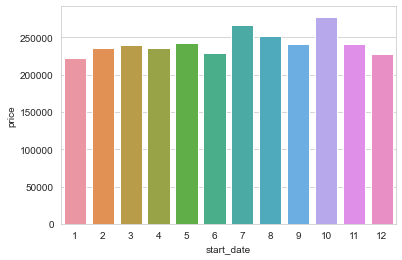

In [40]:
sns.barplot(x='start_date',y='price',data=monthplot)

<AxesSubplot:xlabel='end_date', ylabel='price'>

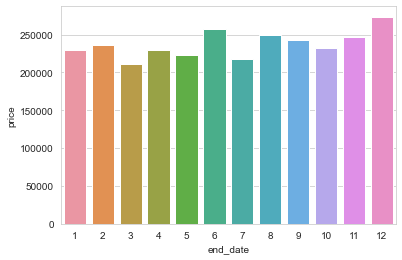

In [41]:
monthplot = monthdf.groupby('end_date').sum().price/monthdf.groupby('end_date').count().price
monthplot = monthplot.reset_index()
sns.barplot(x='end_date',y='price',data=monthplot)

In [42]:
yeardf = pd.DataFrame()
yeardf['price'] = date[date['end_date']!='9999-12-31']['price']
yeardf['start_date'] = date[date['end_date']!='9999-12-31']['start_date'].astype('datetime64[ns]').dt.year
yeardf['end_date'] = date[date['end_date']!='9999-12-31']['end_date'].astype('datetime64[ns]').dt.year


<AxesSubplot:xlabel='start_date', ylabel='price'>

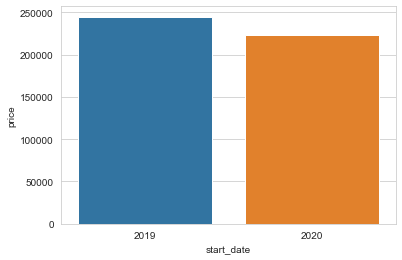

In [43]:
yearplot = yeardf.groupby('start_date').sum().price/yeardf.groupby('start_date').count().price
yearplot = yearplot.reset_index()
sns.barplot(x='start_date',y='price',data=yearplot)

<AxesSubplot:xlabel='end_date', ylabel='price'>

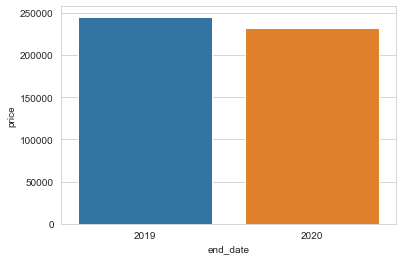

In [44]:
yearplot = yeardf.groupby('end_date').sum().price/yeardf.groupby('end_date').count().price
yearplot = yearplot.reset_index()
sns.barplot(x='end_date',y='price',data=yearplot)

Aunque dejamos fuera algunas filas donde el valor de la fecha de finalización era imposible de convertir a formato fecha, se puede ver a simple vista que los gráficos no demuestran que las fechas puedan influir en el precio, pero para verlo de otra manera buscamos la correlación entre las fechas y los precios

In [45]:
date_corr = properati[date['end_date']!='9999-12-31'][['price','start_date','end_date']]

In [46]:
date_corr['start_date'] = pd.to_numeric(pd.to_datetime(date_corr.start_date))

In [47]:
date_corr['end_date'] = pd.to_numeric(pd.to_datetime(date_corr.end_date))

In [48]:
date_corr.corr()

price  start_date  end_date
price       1.000000    0.011460  0.014298
start_date  0.011460    1.000000  0.849381
end_date    0.014298    0.849381  1.000000

In [49]:
date_corr.corr(method='spearman')

price  start_date  end_date
price       1.000000   -0.003984 -0.006110
start_date -0.003984    1.000000  0.842129
end_date   -0.006110    0.842129  1.000000

Vemos que la correlación es demasiado baja y optamos por eliminar las fechas de nuestro dataset

In [50]:
# properati = properati.drop([ 'start_date', 'end_date', 'created_on'], axis=1) 

### 1.2 Análisis Bivariado

Ahora se analizará las variables mencionadas anteriormente y su relación entre sí

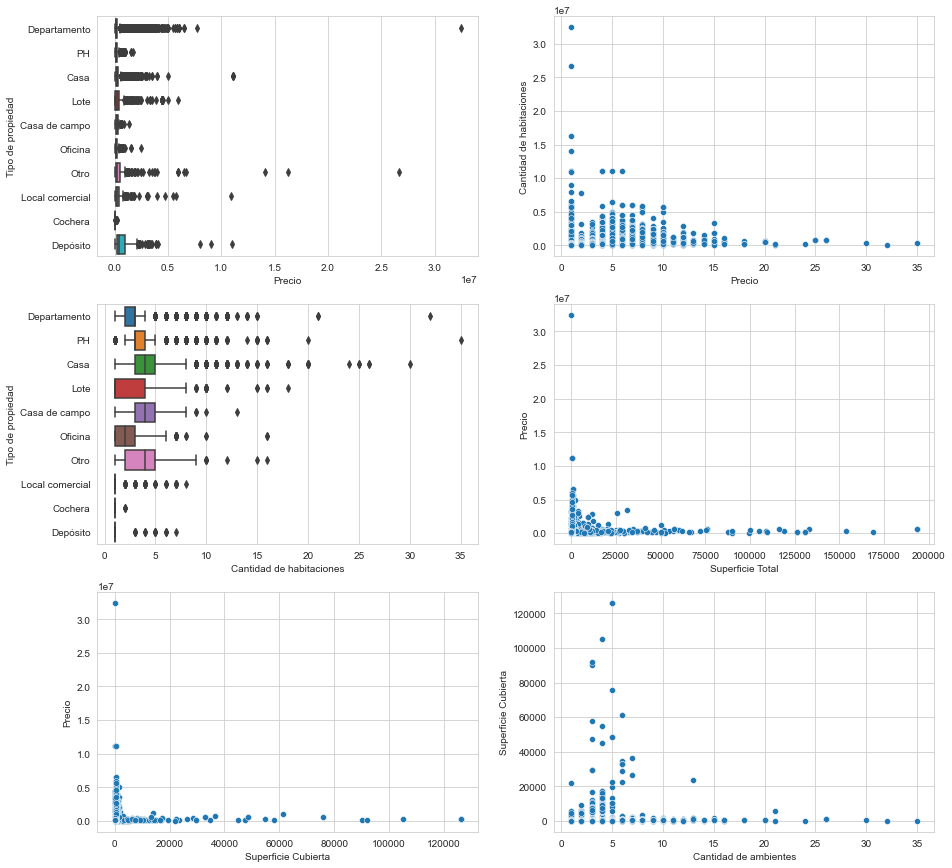

In [51]:
# Precio por tipo de propiedad
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
# Precio por tipo de propiedad
sns.boxplot(x='price', y='property_type', data=properati, orient='h')
plt.xlabel('Precio')
plt.ylabel('Tipo de propiedad')

plt.subplot(3,2,2)
# Precio por cantidad de habitaciones
sns.scatterplot(data=properati, x="rooms", y="price")
plt.xlabel('Precio')
plt.ylabel('Cantidad de habitaciones')


plt.subplot(3,2,3)
# Cantidad de habitaciones por tipo de propiedad
sns.boxplot(x='rooms', y='property_type', data=properati, orient='h')
plt.xlabel('Cantidad de habitaciones')
plt.ylabel('Tipo de propiedad')

plt.subplot(3,2,4)
# se grafica la relación entre superficie total y precio
sns.scatterplot(data=properati, x="surface_total", y="price")
plt.xlabel('Superficie Total')
plt.ylabel('Precio')

plt.subplot(3,2,5)
# se grafica la relación entre superficie cubierta y precio
sns.scatterplot(data=properati, x="surface_covered", y="price")
plt.xlabel('Superficie Cubierta')
plt.ylabel('Precio')

plt.subplot(3,2,6)
# se grafica la relación entre cantidad de habitaciones y superficie cubierta
sns.scatterplot(data=properati, x="rooms", y="surface_covered")
plt.xlabel('Cantidad de ambientes')
plt.ylabel('Superficie Cubierta')

plt.show()

Analizamos las correlaciones entre variables numéricas mediante el uso de la herramienta "Heatmap". Debido a la presencia de una gran cantidad de outliers se usará el coeficiente de Spearman para medir la fuerza de la correlación en esta etapa del estudio.

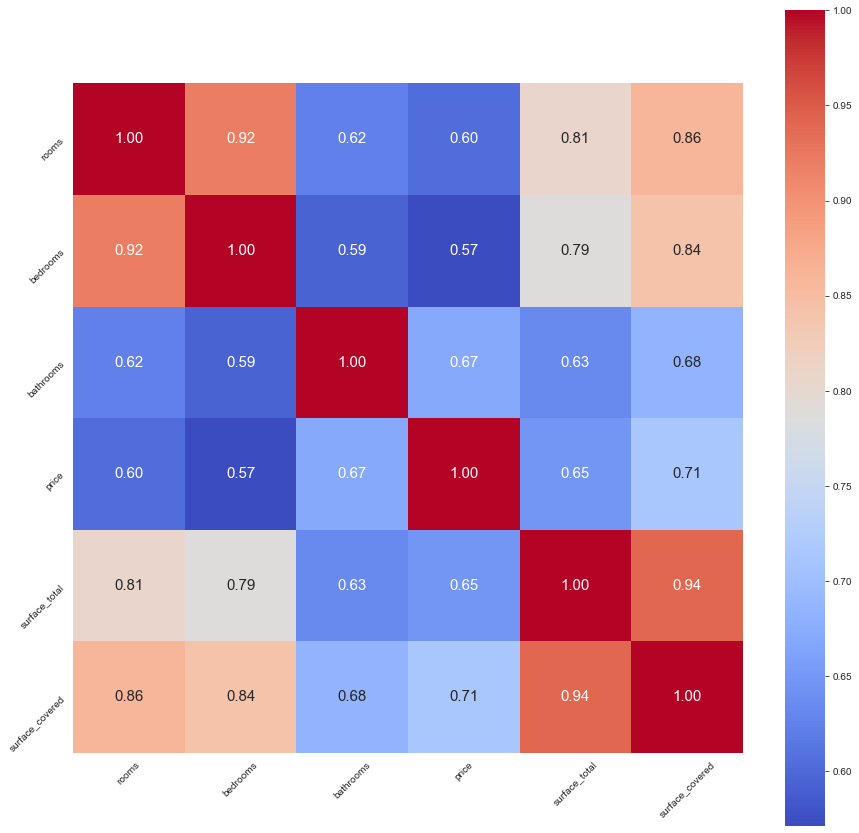

In [52]:
#Heatmap de la matriz de correlación con spearman para ver las relaciones entre variables discretas

plt.figure(figsize=(15,15))

sns.heatmap(properati[['rooms','bedrooms','bathrooms','price','surface_total','surface_covered']].corr(method='spearman'), 
            cbar = True, 
            square = True, 
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 15},
            cmap= 'coolwarm') 

plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()


En función de los valores de correlación y graficos de dispersión, se puede observar que no existen relaciones lineales entre las variables numéricas en los datos sin tratamiento

## 1.3 Tratamiento de valores nulos y outliers

Se observa una muy elevada cantidad de outliers en el dataset por lo que se deberá modelar con los datos que resulten representativos de la muestra

Como dijimos anteriormente, se trabajará únicamente con los tipos de propiedad Casa, PH y Departamento que son los que mayor porcentaje.

In [53]:
# filtrado de dataset: property_type = Departamento, Casa y PH
properati = properati[(properati.property_type.isin(['Departamento','Casa','PH']))]

In [54]:
get_na(properati)

datos sin NAs en q  Na en q  Na en %
surface_covered              124236    18909    13.21
surface_total                124522    18623    13.01
lon                          133521     9624     6.72
lat                          133552     9593     6.70
bathrooms                    138934     4211     2.94
start_date                   143145        0     0.00
end_date                     143145        0     0.00
created_on                   143145        0     0.00
provincia                    143145        0     0.00
barrio                       143145        0     0.00
rooms                        143145        0     0.00
bedrooms                     143145        0     0.00
price                        143145        0     0.00
title                        143145        0     0.00
description                  143145        0     0.00
property_type                143145        0     0.00

Vemos que el numero de valores nulos disminuye en pequeña medida, y debido al porcentaje que ocupan (14% aprox) se decide eliminarlos

In [55]:
properati.dropna(inplace=True)
print(properati.shape)

(113763, 16)


In [56]:
#sin los na podemos convertir las variables discretas a enteros
properati['bedrooms'] = properati['bedrooms'].astype('int')
properati['bathrooms'] = properati['bathrooms'].astype('int')
properati['surface_covered'] = properati['surface_covered'].astype('int')
properati['surface_total'] = properati['surface_total'].astype('int')

Como ya fue analizado, existen registros con superficie cubierta menor a la superficie total y numero de dormitorios mayor a numero de ambientes, lo cual resulta ilógico y ocupan un porcentaje muy bajo de la cantidad de datos.

Debido a esto se eliminan los registros que cumplan con esta condición

In [57]:
# Eliminamos las filas con más superficie cubierta que total
properati = properati[ properati['surface_covered'] <= properati['surface_total'] ]

In [58]:
# Eliminamos las filas que tengan más dormitorios que ambientes
properati = properati[ properati['bedrooms'] <= properati['rooms'] ]

In [59]:
# Vemos la dimensión del dataset filtrado
datos = properati.shape[0]
print('Luego del primer filtro quedan %i filas' % datos)

Luego del primer filtro quedan 112268 filas


Luego de este primer filtrado de datos, se comenzarán a tratar los valores extremos de las variables: precio y superficie total 
Para esto se creará una función que devuelva los percentiles que se quieran evaluar

In [60]:
def perc_val(df, prop_type, variable, q1, q2):
    '''
    Dado un dataframe y una variable, se obtienen los percentiles q1 y q2 buscados para el tipo de propiedad indicada

    Args:
    df: dataframe
    prop_type: tipo de propiedad (Departamento, PH, Casa)
    variable: variable en la que se buscará los percentiles
    q1: percentil inferior buscado expresado en porcentaje
    q2: percentil superior buscado expresado en porcentaje

    Return:
    q1_result: valor de la variable para la cual el q1% de los valores son menores o iguales
    q2_result: valor de la variable para la cual el q2% de los valores son menores o iguales
    '''

    q1_result, q2_result = np.percentile(df[df['property_type']== prop_type][variable], [q1, q2])
    
    print('El percentil %i de %s de %s es: %.2f -- El percentil %i de %s de %s es: %.2f' % (q1, variable, prop_type, q1_result, q2, variable, prop_type, q2_result))
    return q1_result, q2_result

In [61]:
q75_price_ph, q25_price_ph = perc_val(properati, 'PH', 'price', 75, 25)

El percentil 75 de price de PH es: 248000.00 -- El percentil 25 de price de PH es: 110000.00


In [62]:
q75_price_dep, q25_price_dep = perc_val(properati, 'Departamento', 'price', 75, 25)


El percentil 75 de price de Departamento es: 256000.00 -- El percentil 25 de price de Departamento es: 112900.00


In [63]:
q75_price_casa, q25_price_casa = perc_val(properati, 'Casa', 'price', 75, 25)

El percentil 75 de price de Casa es: 325000.00 -- El percentil 25 de price de Casa es: 129900.00


In [64]:
properati_ph = properati[(properati['property_type']=='PH')&(properati['price']>=q25_price_ph)&(properati['price']<=q75_price_ph)]
properati_dep = properati[(properati['property_type']=='Departamento')&(properati['price']>=q25_price_dep)&(properati['price']<=q75_price_dep)]
properati_casa = properati[(properati['property_type']=='Casa')&(properati['price']>=q25_price_casa)&(properati['price']<=q75_price_casa)]

In [65]:
print(properati_ph.shape)
print(properati_dep.shape)
print(properati_casa.shape)

(6731, 16)
(42155, 16)
(7319, 16)


In [66]:
properati_25_75 = pd.concat([properati_ph,properati_dep,properati_casa])

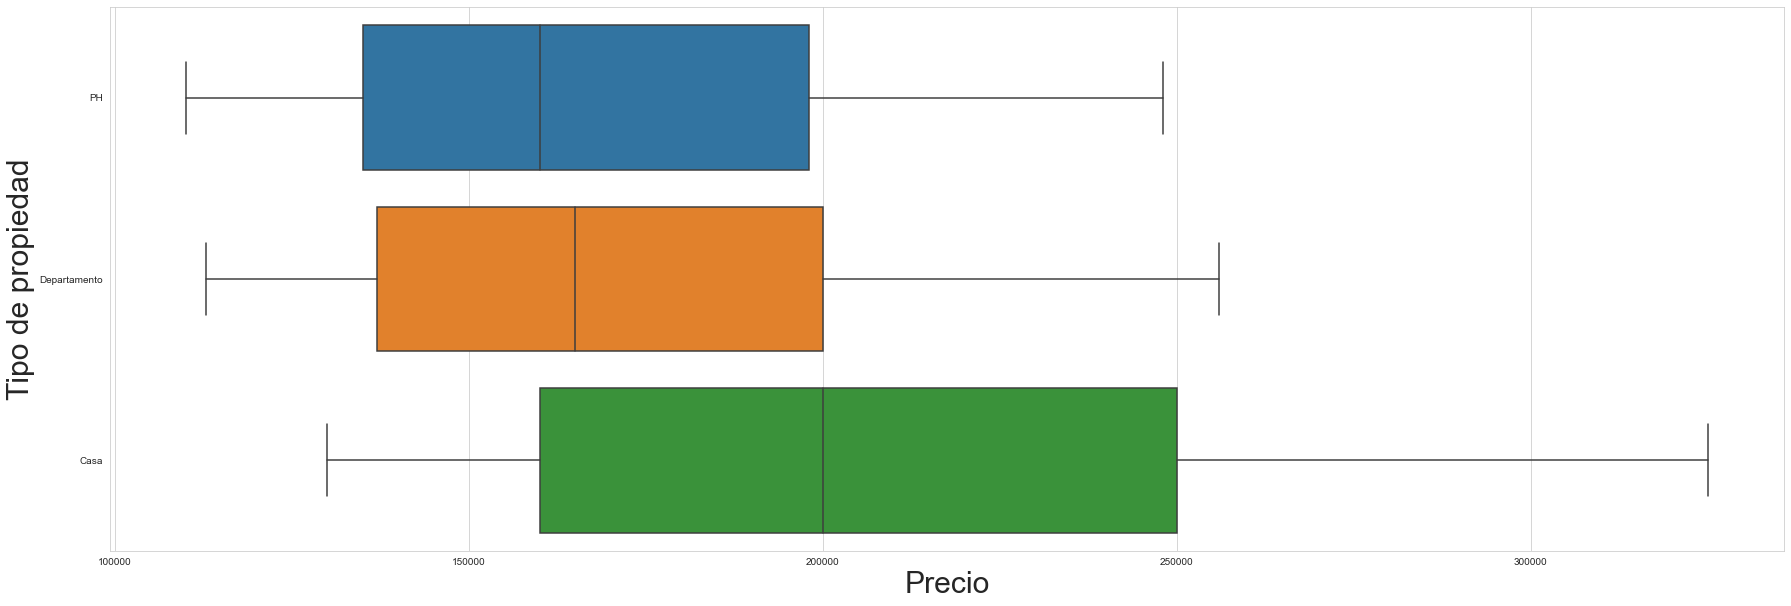

In [67]:
# Precio por tipo de propiedad

plt.figure(figsize=(30,10))
sns.boxplot(x='price', y='property_type', data=properati_25_75, orient='h')
plt.xlabel('Precio', size = 30)
plt.ylabel('Tipo de propiedad', size = 30)
plt.show()



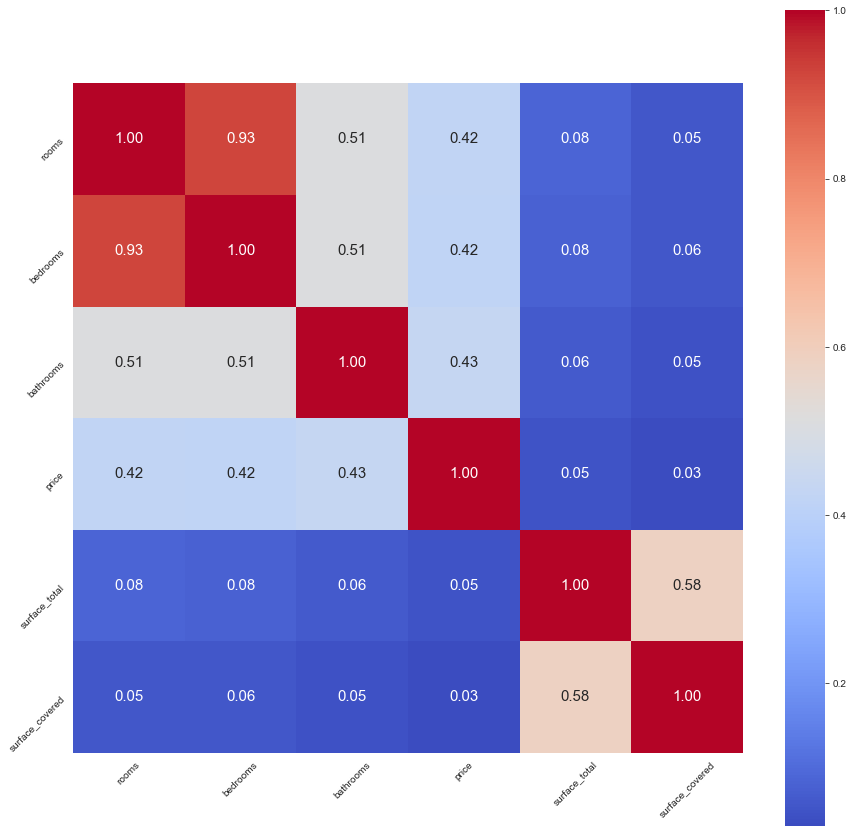

In [68]:
# Heatmap de la matriz de correlación

plt.figure(figsize=(15,15))

sns.heatmap(properati_25_75[['rooms','bedrooms','bathrooms','price','surface_total','surface_covered']].corr(), 
            cbar = True, 
            square = True, 
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 15},
            cmap= 'coolwarm') 

plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()


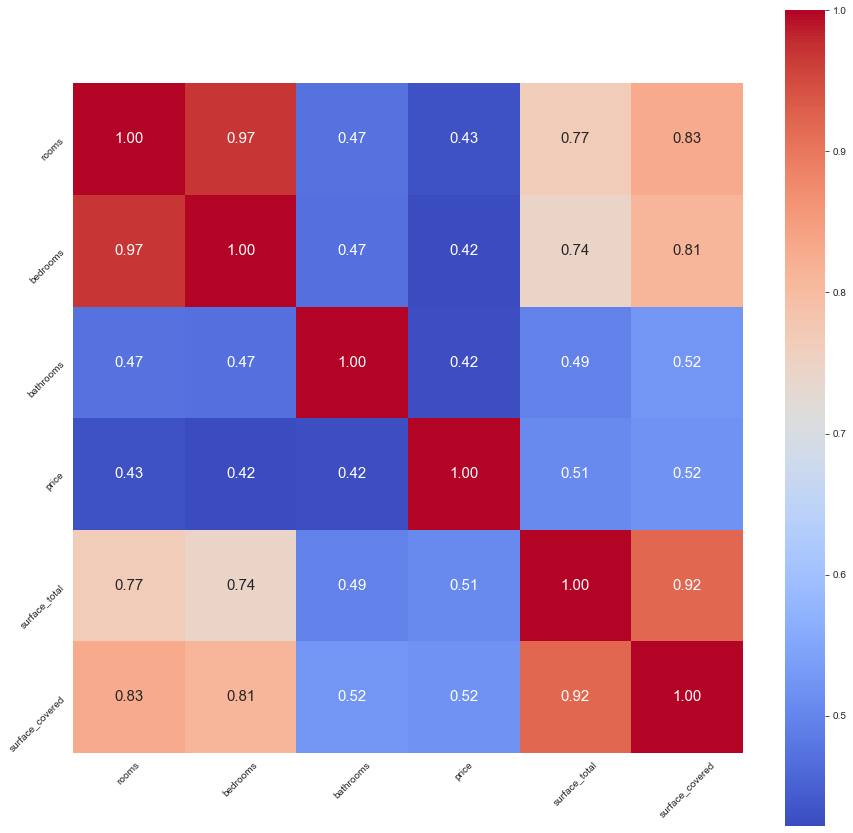

In [69]:
# Heatmap de la matriz de correlación con spearman para ver las relaciones entre variables discretas

plt.figure(figsize=(15,15))

sns.heatmap(properati_25_75[['rooms','bedrooms','bathrooms','price','surface_total','surface_covered']].corr(method='spearman'), 
            cbar = True, 
            square = True, 
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 15},
            cmap= 'coolwarm') 

plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()


In [70]:
# se realiza el filtrado solamente de manera superior
properati_ph = properati[(properati['property_type']=='PH')&(properati['price']<=q75_price_ph)]
properati_dep = properati[(properati['property_type']=='Departamento')&(properati['price']<=q75_price_dep)]
properati_casa = properati[(properati['property_type']=='Casa')&(properati['price']<=q75_price_casa)]

In [71]:
print(properati_ph.shape)
print(properati_dep.shape)
print(properati_casa.shape)

(10079, 16)
(63220, 16)
(10949, 16)


In [72]:
properati_75 = pd.concat([properati_ph,properati_dep,properati_casa])
properati_75.shape

(84248, 16)

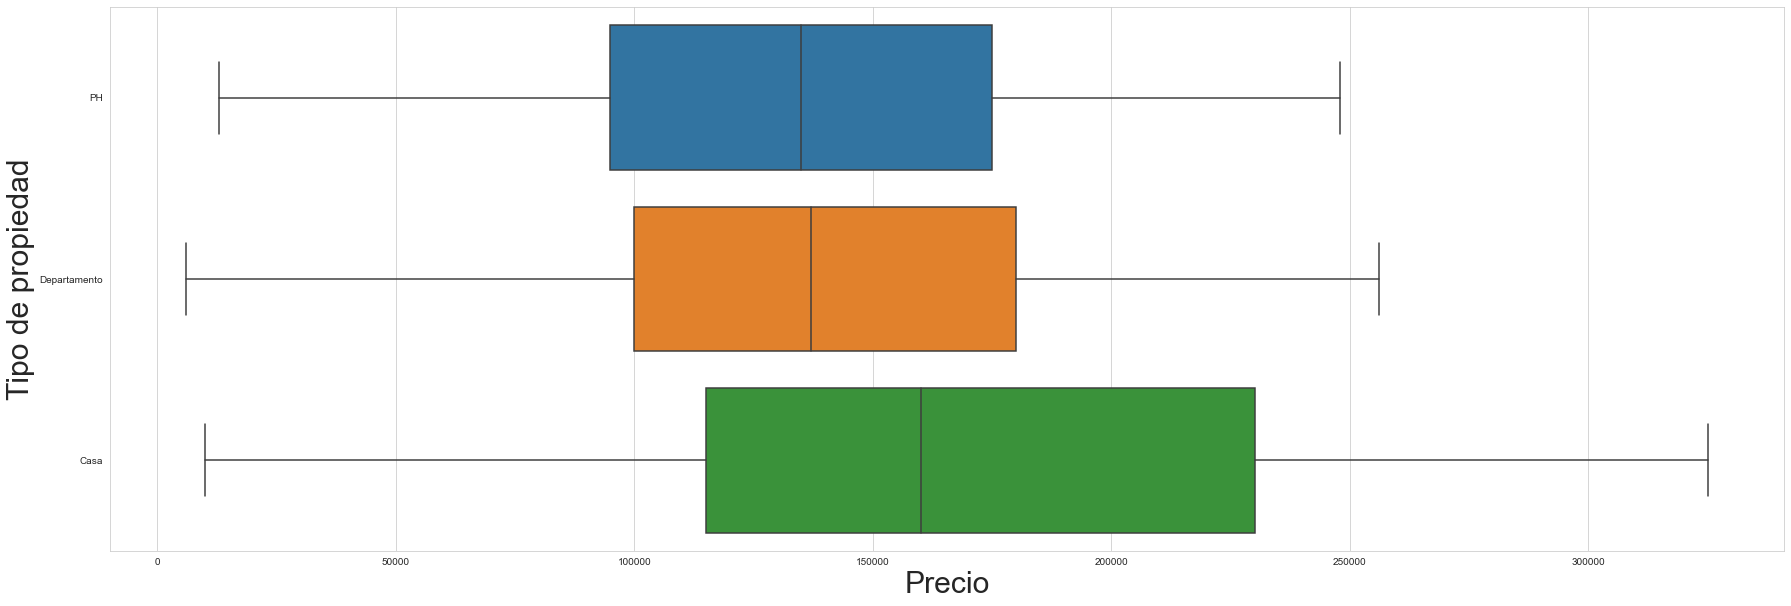

In [73]:
# Precio por tipo de propiedad

plt.figure(figsize=(30,10))
sns.boxplot(x='price', y='property_type', data=properati_75, orient='h')
plt.xlabel('Precio', size = 30)
plt.ylabel('Tipo de propiedad', size = 30)
plt.show()



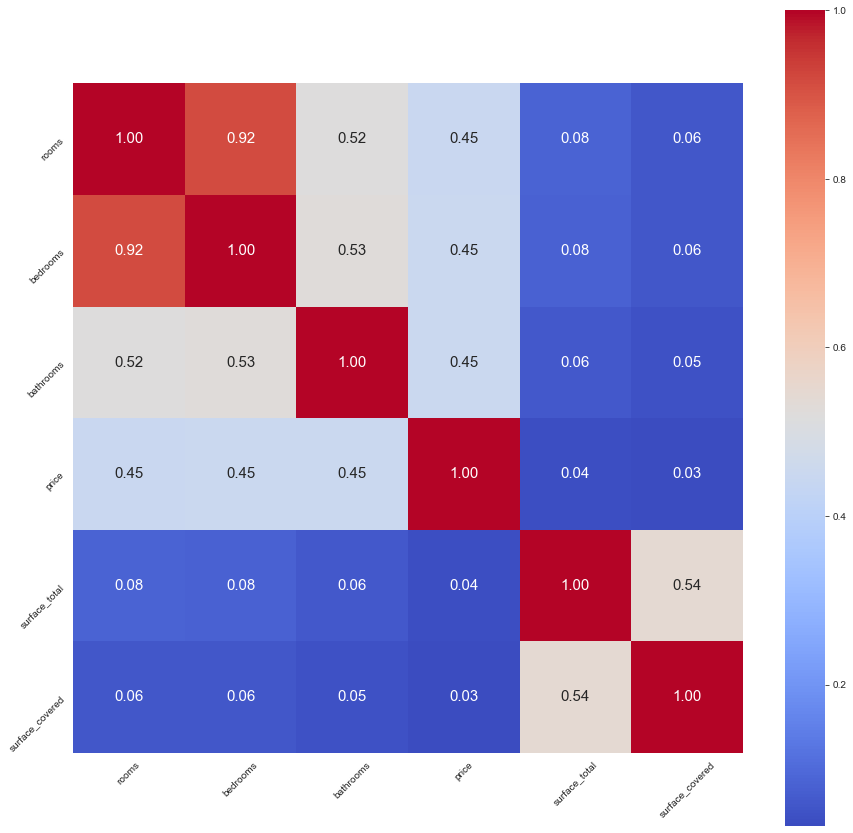

In [74]:
#Heatmap de la matriz de correlación

plt.figure(figsize=(15,15))

sns.heatmap(properati_75[['rooms','bedrooms','bathrooms','price','surface_total','surface_covered']].corr(), 
            cbar = True, 
            square = True, 
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 15},
            cmap= 'coolwarm') 

plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()


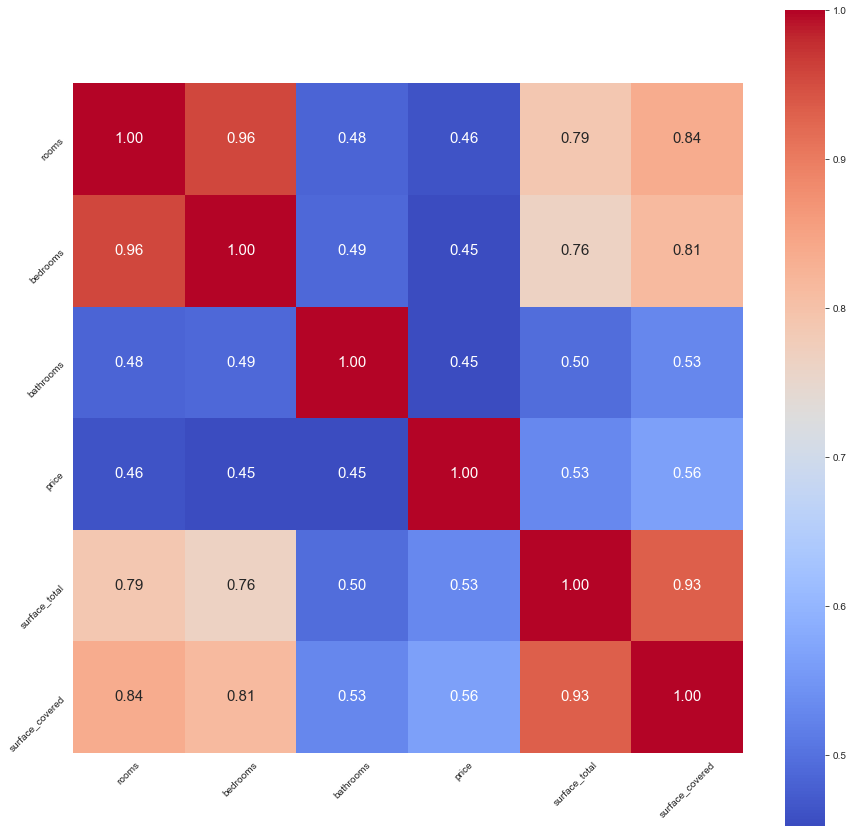

In [75]:
#Heatmap de la matriz de correlación con spearman para ver las relaciones entre variables discretas

plt.figure(figsize=(15,15))

sns.heatmap(properati_75[['rooms','bedrooms','bathrooms','price','surface_total','surface_covered']].corr(method='spearman'), 
            cbar = True, 
            square = True, 
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 15},
            cmap= 'coolwarm') 

plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()


Se observa una notable mejora en el comportamiento de las cajas, a costa de una disminución en el número de datos, eliminar solo el cuartil superior tiene una leve mejora con respecto a eliminar ambos cuartiles

Ahora vamos a eliminar outliers de superficie por tipo de propiedad, decidimos dejar fuera el 10% de los precios más altos por tipo de propiedad

Se decide agregar un límite para el número de ambientes de 10

In [76]:
# Eliminamos las filas con cantidad de ambientes mayor a 10
properati_75 = properati_75[properati_75['rooms'] <= 10]

In [77]:
q90_surfacet_ph, q10_surfacet_ph = perc_val(properati_75, 'PH', 'surface_total', 90, 10)

El percentil 90 de surface_total de PH es: 176.00 -- El percentil 10 de surface_total de PH es: 47.00


In [78]:
q90_surfacet_dep, q10_surfacet_dep = perc_val(properati_75, 'Departamento', 'surface_total', 90, 10)

El percentil 90 de surface_total de Departamento es: 92.00 -- El percentil 10 de surface_total de Departamento es: 37.00


In [79]:
q90_surfacet_casa, q10_surfacet_casa = perc_val(properati_75, 'Casa', 'surface_total', 90, 10)

El percentil 90 de surface_total de Casa es: 840.00 -- El percentil 10 de surface_total de Casa es: 125.00


In [80]:
casa = properati_75[properati_75["property_type"]=="Casa"]
ph = properati_75[properati_75["property_type"]=="PH"]
dep = properati_75[properati_75["property_type"]=="Departamento"]

In [81]:
ph = properati_75[(properati_75['property_type']=='PH')&(properati_75['surface_total']<=q90_surfacet_ph)]
dep = properati_75[(properati_75['property_type']=='Departamento')&(properati_75['surface_total']<=q90_surfacet_dep)]
casa = properati_75[(properati_75['property_type']=='Casa')&(properati_75['surface_total']<=q90_surfacet_casa)]

Por ultimo, para tener una mayor coherencia a la hora de aplicar modelos de machine learning, tomamos como criterio conservar solo los registros con barrios que en total tengan 50 o más muestras, diferenciando por tipo de propiedad.

In [82]:
cantidad_ph_x_barrio = ph.groupby('barrio').count()['lat'].reset_index()
barrios_incluir_ph = cantidad_ph_x_barrio[cantidad_ph_x_barrio['lat']>=50]['barrio']
cantidad_dep_x_barrio = dep.groupby('barrio').count()['lat'].reset_index()
barrios_incluir_dep = cantidad_dep_x_barrio[cantidad_dep_x_barrio['lat']>=50]['barrio']
cantidad_casa_x_barrio = casa.groupby('barrio').count()['lat'].reset_index()
barrios_incluir_casa = cantidad_casa_x_barrio[cantidad_casa_x_barrio['lat']>=50]['barrio']

In [83]:
ph = ph[ph['barrio'].isin(barrios_incluir_ph)]
dep = dep[dep['barrio'].isin(barrios_incluir_dep)]
casa = casa[casa['barrio'].isin(barrios_incluir_casa)]

In [84]:
properati = pd.concat([casa,ph,dep])
properati.shape

(73934, 16)

In [85]:
print("Cantidad de casas: ",casa.shape[0])
print("Cantidad de PH: ",ph.shape[0])
print("Cantidad de departamentos: ",dep.shape[0])

Cantidad de casas:  9126
Cantidad de PH:  8242
Cantidad de departamentos:  56566


## 1.4 Resultados del filtro de datos

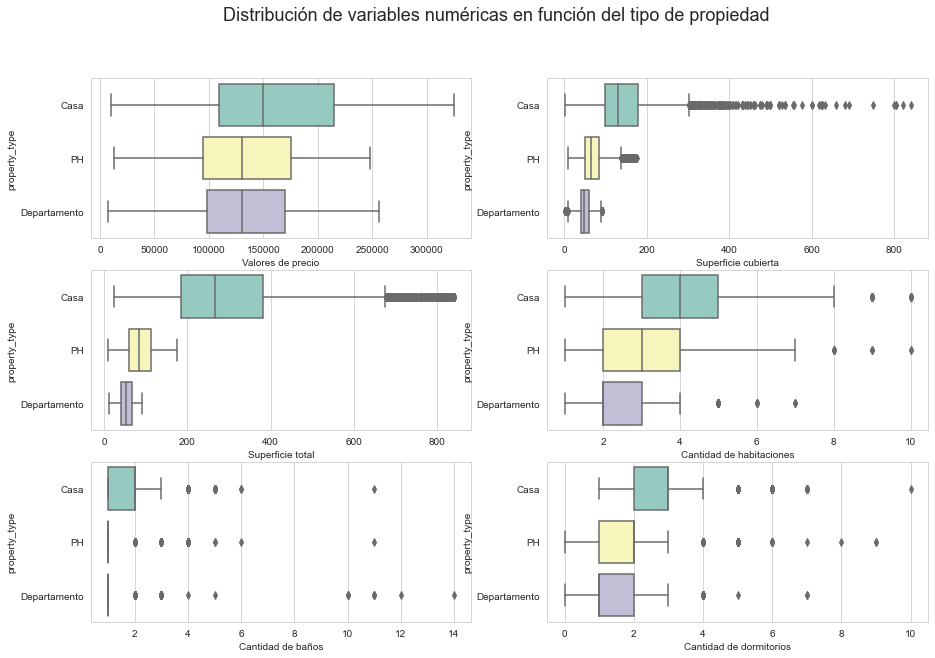

In [86]:
# Graficos de caja de variables tratadas

plt.figure(figsize = (15,10))
plt.suptitle('Distribución de variables numéricas en función del tipo de propiedad', size=18)

plt.subplot(3,2,1)
sns.boxplot(x='price', data=properati, y='property_type', palette = 'Set3').set(xlabel='Valores de precio')


plt.subplot(3,2,2)
sns.boxplot(x='surface_covered', data=properati, y='property_type', palette = 'Set3').set(xlabel='Superficie cubierta')


plt.subplot(3,2,3)
sns.boxplot(x='surface_total', y='property_type',data=properati, palette = 'Set3').set(xlabel='Superficie total')


plt.subplot(3,2,4)
sns.boxplot(x='rooms',y='property_type' ,data=properati, palette = 'Set3').set(xlabel='Cantidad de habitaciones')

plt.subplot(3,2,5)
sns.boxplot(x='bathrooms',y='property_type', data=properati, palette = 'Set3').set(xlabel='Cantidad de baños')

plt.subplot(3,2,6)
sns.boxplot(x='bedrooms',y='property_type', data=properati, palette = 'Set3').set(xlabel='Cantidad de dormitorios')

plt.show()

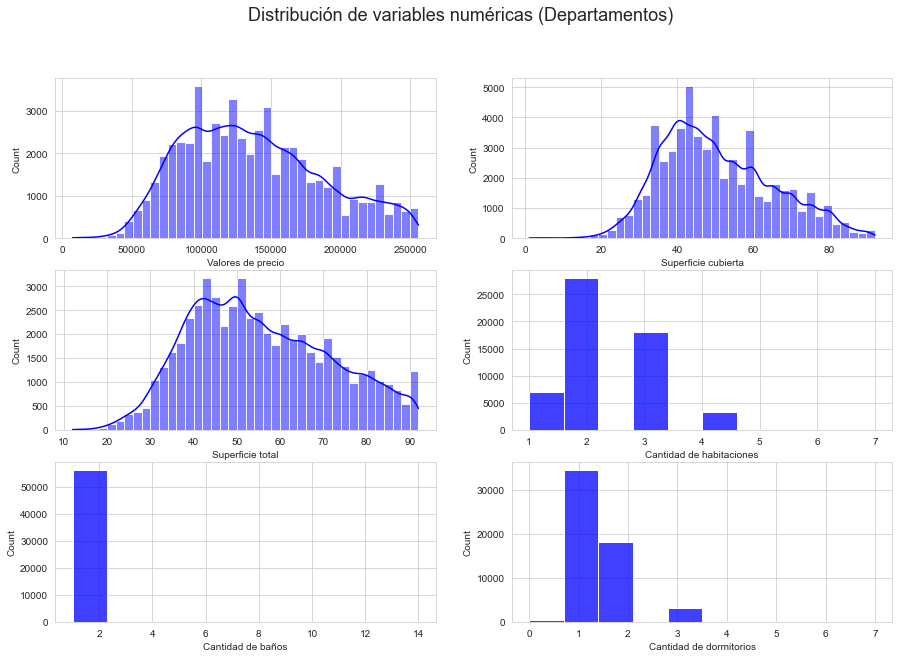

In [87]:
plt.figure(figsize = (15,10))

plt.suptitle('Distribución de variables numéricas (Departamentos)', size=18)

plt.subplot(3,2,1)

sns.histplot(x='price', data=dep, color='blue', kde=True, bins=40).set(xlabel='Valores de precio')


plt.subplot(3,2,2)
sns.histplot(x='surface_covered', data=dep, color='blue', kde=True, bins=40).set(xlabel='Superficie cubierta')


plt.subplot(3,2,3)
sns.histplot(x='surface_total', data=dep, color='blue', kde=True, bins=40).set(xlabel='Superficie total')


plt.subplot(3,2,4)
sns.histplot(x='rooms', data=dep, color='blue', bins=10).set(xlabel='Cantidad de habitaciones')

plt.subplot(3,2,5)
sns.histplot(x='bathrooms', data=dep, color='blue', bins=10).set(xlabel='Cantidad de baños')

plt.subplot(3,2,6)
sns.histplot(x='bedrooms', data=dep, color='blue', bins=10).set(xlabel='Cantidad de dormitorios')

plt.show()

##### DEPARTAMENTOS
De la observación de los histogramas podemos destacar que la mayor parte de los departamentos se encuentran valuados en un rango de 100000 a 200000 USD (los valores se encuentran bastante dispersos), y tienen una superficie total de aprox 50 m2 (aunque estos datos se encuentras mas dispersos hacia la derecha). En cuanto al número de ambientes la gran mayoria se encuentran entre 3 y 2. Estos resultados resultan bastante adecuados.

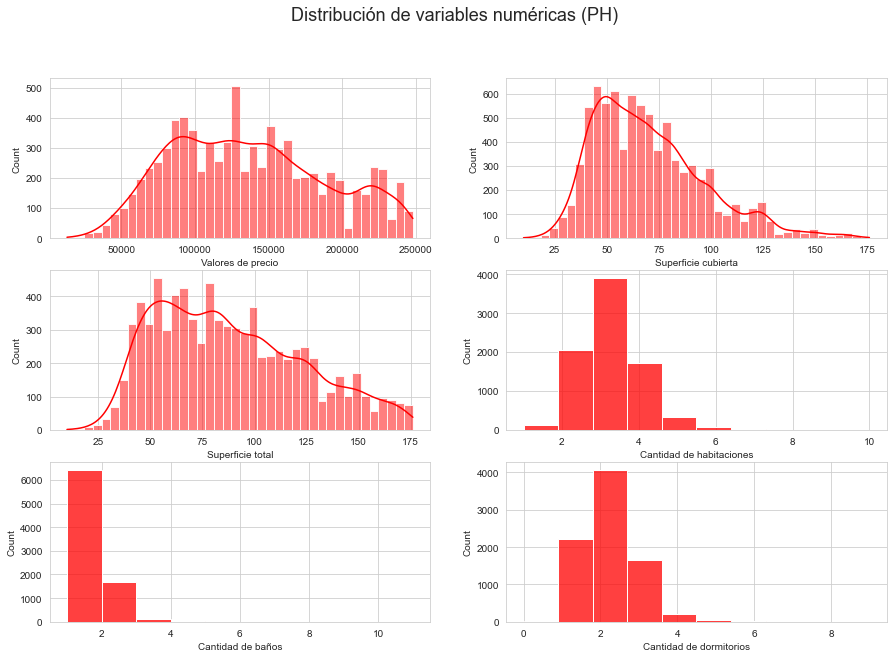

In [88]:
plt.figure(figsize = (15,10))
plt.suptitle('Distribución de variables numéricas (PH)', size=18)

plt.subplot(3,2,1)

sns.histplot(x='price', data=ph, color='red', kde=True, bins=40).set(xlabel='Valores de precio')


plt.subplot(3,2,2)
sns.histplot(x='surface_covered', data=ph, color='red', kde=True, bins=40).set(xlabel='Superficie cubierta')


plt.subplot(3,2,3)
sns.histplot(x='surface_total', data=ph, color='red', kde=True, bins=40).set(xlabel='Superficie total')


plt.subplot(3,2,4)
sns.histplot(x='rooms', data=ph, color='red', bins=10).set(xlabel='Cantidad de habitaciones')

plt.subplot(3,2,5)
sns.histplot(x='bathrooms', data=ph, color='red', bins=10).set(xlabel='Cantidad de baños')

plt.subplot(3,2,6)
sns.histplot(x='bedrooms', data=ph, color='red', bins=10).set(xlabel='Cantidad de dormitorios')

plt.show()

##### PH
De la observación de los histogramas podemos observar que se comporta de una manera similar a los departamentos, y en la superficie total se encuentra una dispersión de los valores, aunque el mayor conteo se ubica en un rango entre 50 y 100 m2 (los valores se encuentran bastante dispersos). En cuanto al número de ambientes la gran mayoria se encuentran entre 2, 3 y 4. 

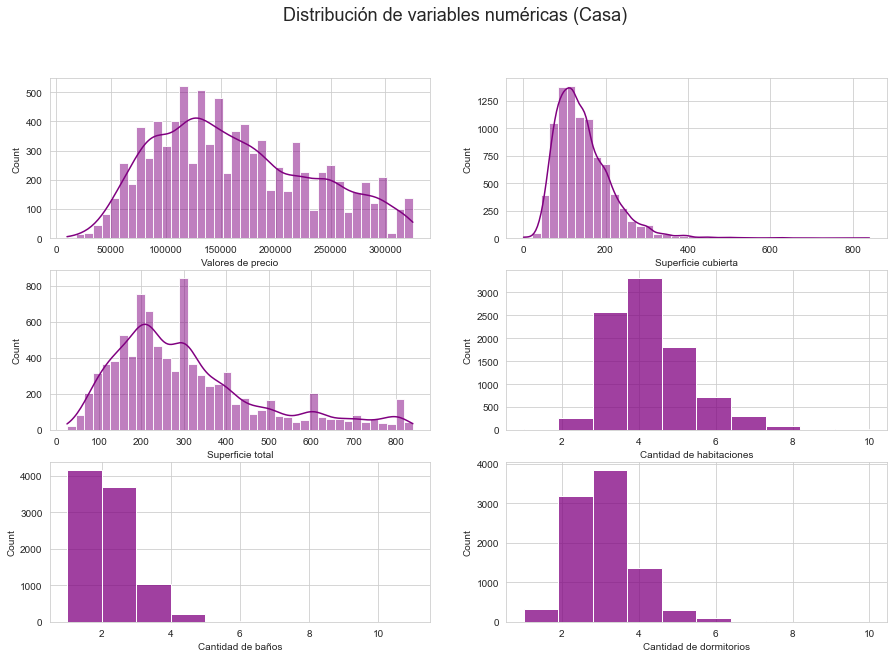

In [89]:
plt.figure(figsize = (15,10))
plt.suptitle('Distribución de variables numéricas (Casa)', size=18)

plt.subplot(3,2,1)

sns.histplot(x='price', data=casa, color='purple', kde=True, bins=40).set(xlabel='Valores de precio')


plt.subplot(3,2,2)
sns.histplot(x='surface_covered', data=casa, color='purple', kde=True, bins=40).set(xlabel='Superficie cubierta')


plt.subplot(3,2,3)
sns.histplot(x='surface_total', data=casa, color='purple', kde=True, bins=40).set(xlabel='Superficie total')


plt.subplot(3,2,4)
sns.histplot(x='rooms', data=casa, color='purple', bins=10).set(xlabel='Cantidad de habitaciones')

plt.subplot(3,2,5)
sns.histplot(x='bathrooms', data=casa, color='purple', bins=10).set(xlabel='Cantidad de baños')

plt.subplot(3,2,6)
sns.histplot(x='bedrooms', data=casa, color='purple', bins=10).set(xlabel='Cantidad de dormitorios')

plt.show()

##### CASA
De la observación de los histogramas podemos destacar los valores de precio y superficie total de las casas se encuentran muy dispersos. En cuanto al número de ambientes la gran mayoria se encuentran entre 3 y 4, otro dato destacable es que la cantidad de baños con mayor frecuencia es 2 en este tipo de propiedades

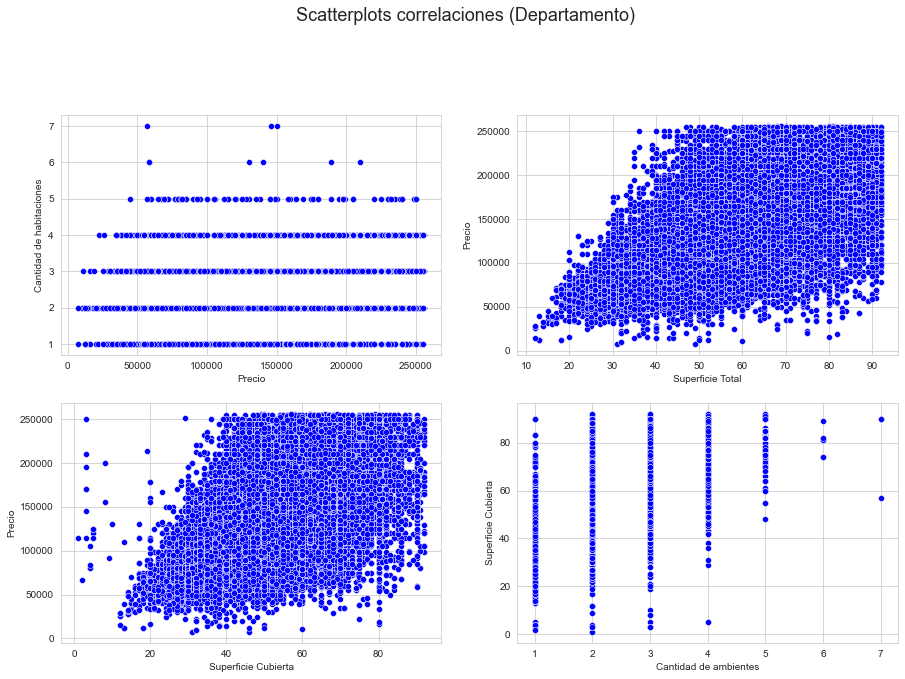

In [90]:
plt.figure(figsize = (15,15))
plt.suptitle('Scatterplots correlaciones (Departamento)', size=18)
plt.subplot(3,2,1)
# Precio por cantidad de habitaciones
sns.scatterplot(data=dep, x="price", y="rooms", color='blue')
plt.xlabel('Precio')
plt.ylabel('Cantidad de habitaciones')

plt.subplot(3,2,2)
# se grafica la relación entre superficie total y precio
sns.scatterplot(data=dep, x="surface_total", y="price", color='blue')
plt.xlabel('Superficie Total')
plt.ylabel('Precio')

plt.subplot(3,2,3)
# se grafica la relación entre superficie cubierta y precio
sns.scatterplot(data=dep, x="surface_covered", y="price", color='blue')
plt.xlabel('Superficie Cubierta')
plt.ylabel('Precio')

plt.subplot(3,2,4)
# se grafica la relación entre cantidad de habitaciones y superficie cubierta
sns.scatterplot(data=dep, x="rooms", y="surface_covered", color='blue')
plt.xlabel('Cantidad de ambientes')
plt.ylabel('Superficie Cubierta')

plt.show()


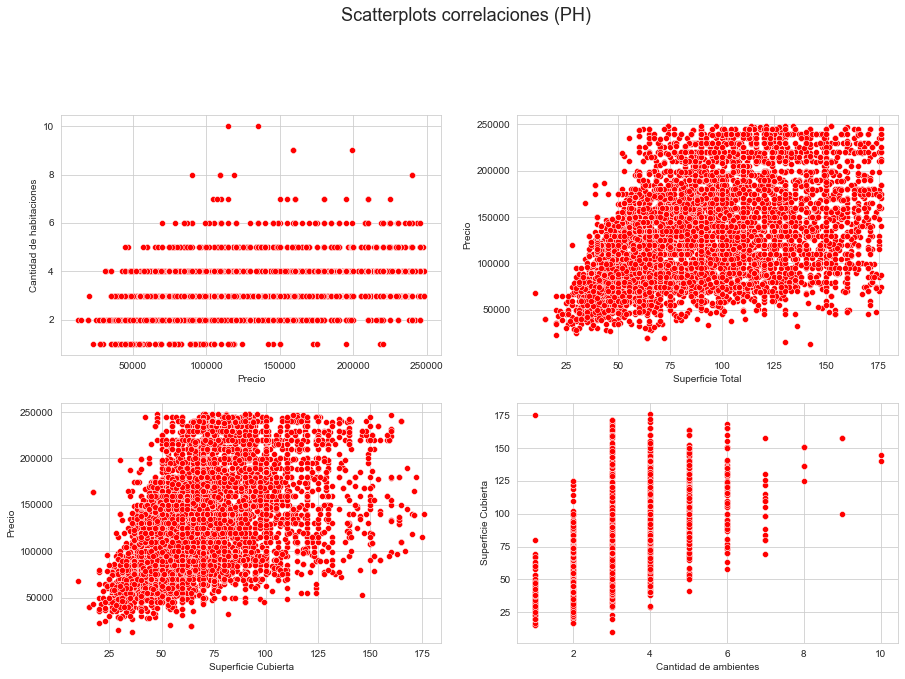

In [91]:
plt.figure(figsize = (15,15))
plt.suptitle('Scatterplots correlaciones (PH)', size=18)
plt.subplot(3,2,1)
# Precio por cantidad de habitaciones
sns.scatterplot(data=ph, x="price", y="rooms", color='red')
plt.xlabel('Precio')
plt.ylabel('Cantidad de habitaciones')

plt.subplot(3,2,2)
# se grafica la relación entre superficie total y precio
sns.scatterplot(data=ph, x="surface_total", y="price", color='red')
plt.xlabel('Superficie Total')
plt.ylabel('Precio')

plt.subplot(3,2,3)
# se grafica la relación entre superficie cubierta y precio
sns.scatterplot(data=ph, x="surface_covered", y="price", color='red')
plt.xlabel('Superficie Cubierta')
plt.ylabel('Precio')

plt.subplot(3,2,4)
# se grafica la relación entre cantidad de habitaciones y superficie cubierta
sns.scatterplot(data=ph, x="rooms", y="surface_covered", color='red')
plt.xlabel('Cantidad de ambientes')
plt.ylabel('Superficie Cubierta')

plt.show()

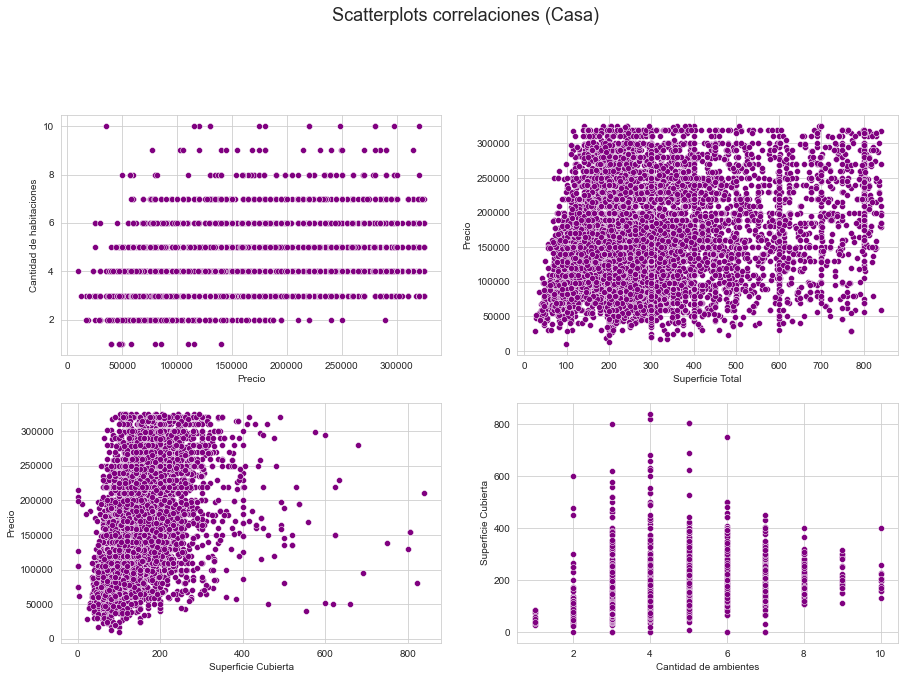

In [92]:
plt.figure(figsize = (15,15))
plt.suptitle('Scatterplots correlaciones (Casa)', size=18)
plt.subplot(3,2,1)
# Precio por cantidad de habitaciones
sns.scatterplot(data=casa, x="price", y="rooms", color='purple')
plt.xlabel('Precio')
plt.ylabel('Cantidad de habitaciones')

plt.subplot(3,2,2)
# se grafica la relación entre superficie total y precio
sns.scatterplot(data=casa, x="surface_total", y="price", color='purple')
plt.xlabel('Superficie Total')
plt.ylabel('Precio')

plt.subplot(3,2,3)
# se grafica la relación entre superficie cubierta y precio
sns.scatterplot(data=casa, x="surface_covered", y="price", color='purple')
plt.xlabel('Superficie Cubierta')
plt.ylabel('Precio')

plt.subplot(3,2,4)
# se grafica la relación entre cantidad de habitaciones y superficie cubierta
sns.scatterplot(data=casa, x="rooms", y="surface_covered", color='purple')
plt.xlabel('Cantidad de ambientes')
plt.ylabel('Superficie Cubierta')

plt.show()

Para los tipos de propiedades DEPARTAMENTO y PH podemos observar fuertes correlaciones en general entre las variables 'price' y 'surface_total'/'surface_covered'. Con el resto tambien fuertes pero en menor medida. Para el tipo de propiedad CASA se observa una correlación mas debil debido a la dispersión y, probablemente, a la menor cantidad de datos, pero aún así se tiene cierta correlación. Para terminar de analizar se realizará un heatmap para ver los valores de correlación utilizando el coeficiente de Spearman.

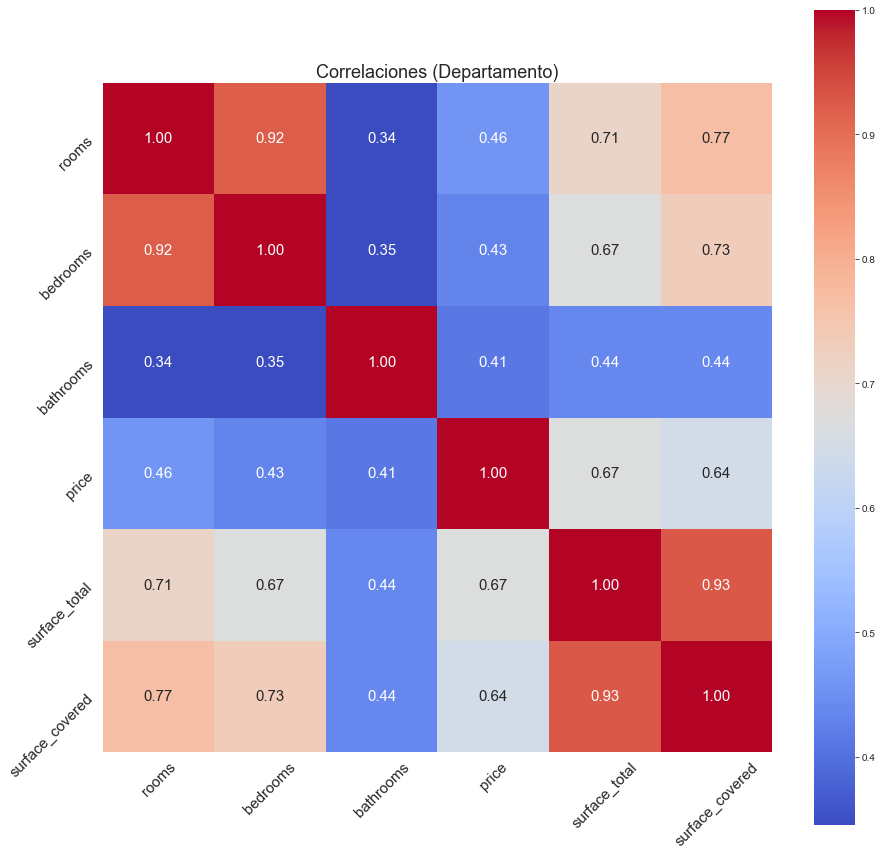

In [93]:
# Heatmap de la matriz de correlación con spearman para ver las relaciones entre variables y que poseen 

plt.figure(figsize=(15,15))
plt.title('Correlaciones (Departamento)', size=18)
sns.heatmap(dep[['rooms','bedrooms','bathrooms','price','surface_total','surface_covered']].corr(method='spearman'), 
            cbar = True, 
            square = True, 
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 15},
            cmap= 'coolwarm') 

plt.xticks(rotation = 45, size=15)
plt.yticks(rotation = 45, size=15)
plt.show()


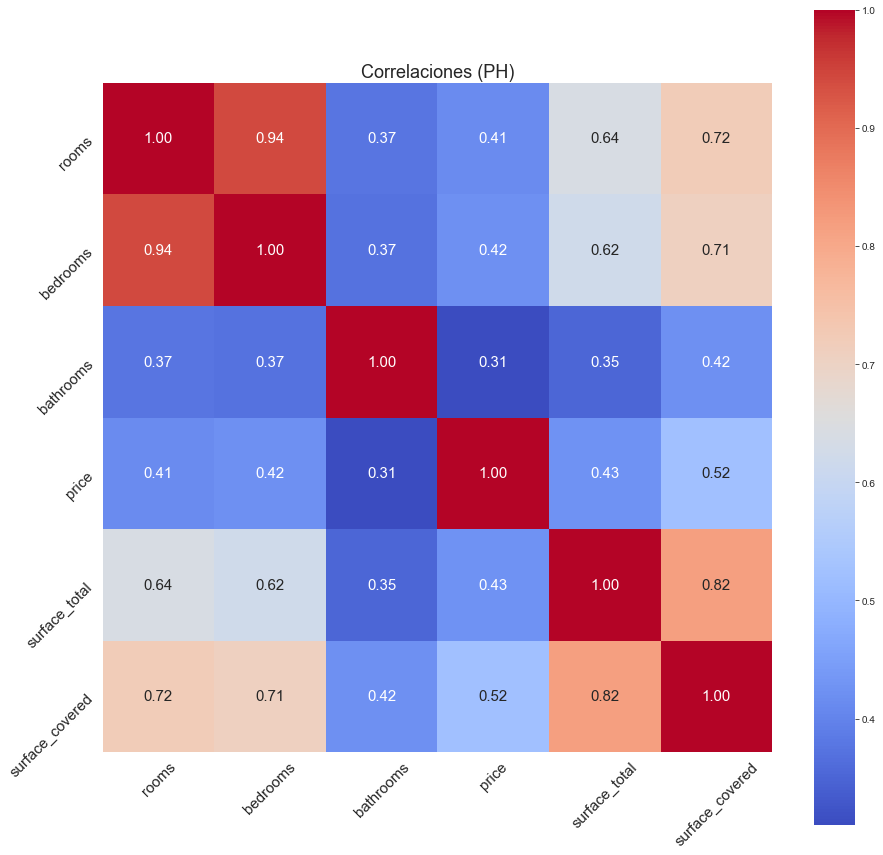

In [94]:
# Heatmap de la matriz de correlación con spearman para ver las relaciones entre variables y que poseen 

plt.figure(figsize=(15,15))
plt.title('Correlaciones (PH)', size=18)
sns.heatmap(ph[['rooms','bedrooms','bathrooms','price','surface_total','surface_covered']].corr(method='spearman'), 
            cbar = True, 
            square = True, 
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 15},
            cmap= 'coolwarm') 

plt.xticks(rotation = 45, size=15)
plt.yticks(rotation = 45, size=15)
plt.show()

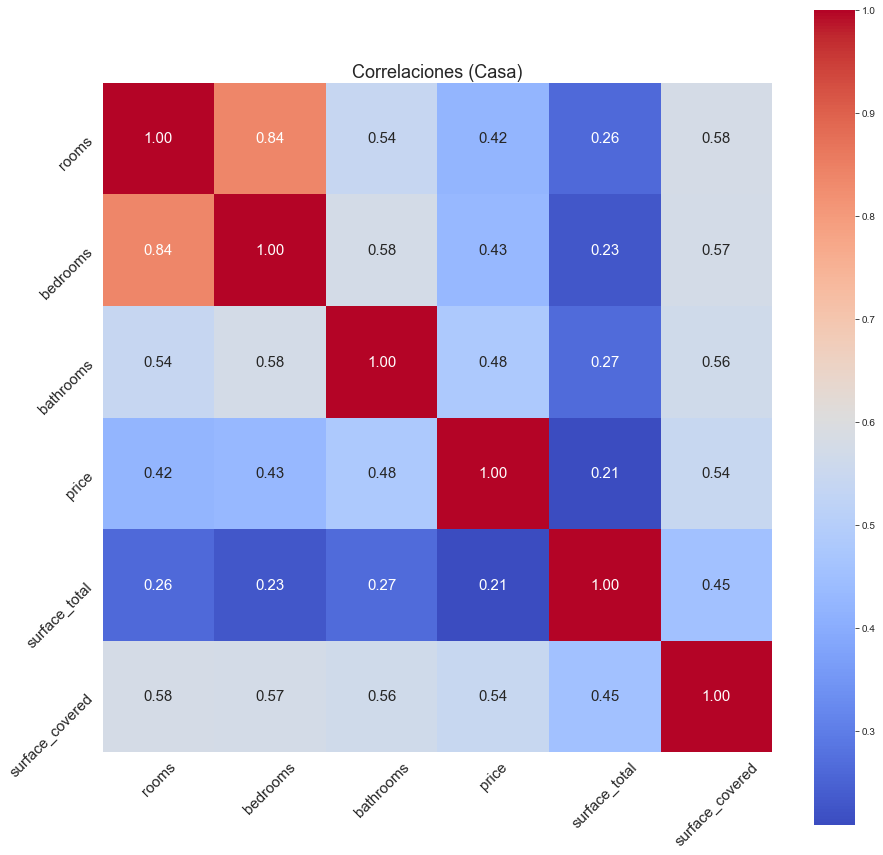

In [95]:
#Heatmap de la matriz de correlación con spearman para ver las relaciones entre variables y que poseen 

plt.figure(figsize=(15,15))
plt.title('Correlaciones (Casa)', size=18)
sns.heatmap(properati_casa[['rooms','bedrooms','bathrooms','price','surface_total','surface_covered']].corr(method='spearman'), 
            cbar = True, 
            square = True, 
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 15},
            cmap= 'coolwarm') 

plt.xticks(rotation = 45, size=15)
plt.yticks(rotation = 45, size=15)
plt.show()

Se confirman las observaciones realizadas, de todas maneras se tienen correlaciones fuertes/medias en general.

Por último, analizaremos la única variable categórica candidata a ser utilizada en el modelo: 'barrios'. De esta manera, se busca detectar si existen barrios en los que los valores de las propiedades sean mayores o menores.

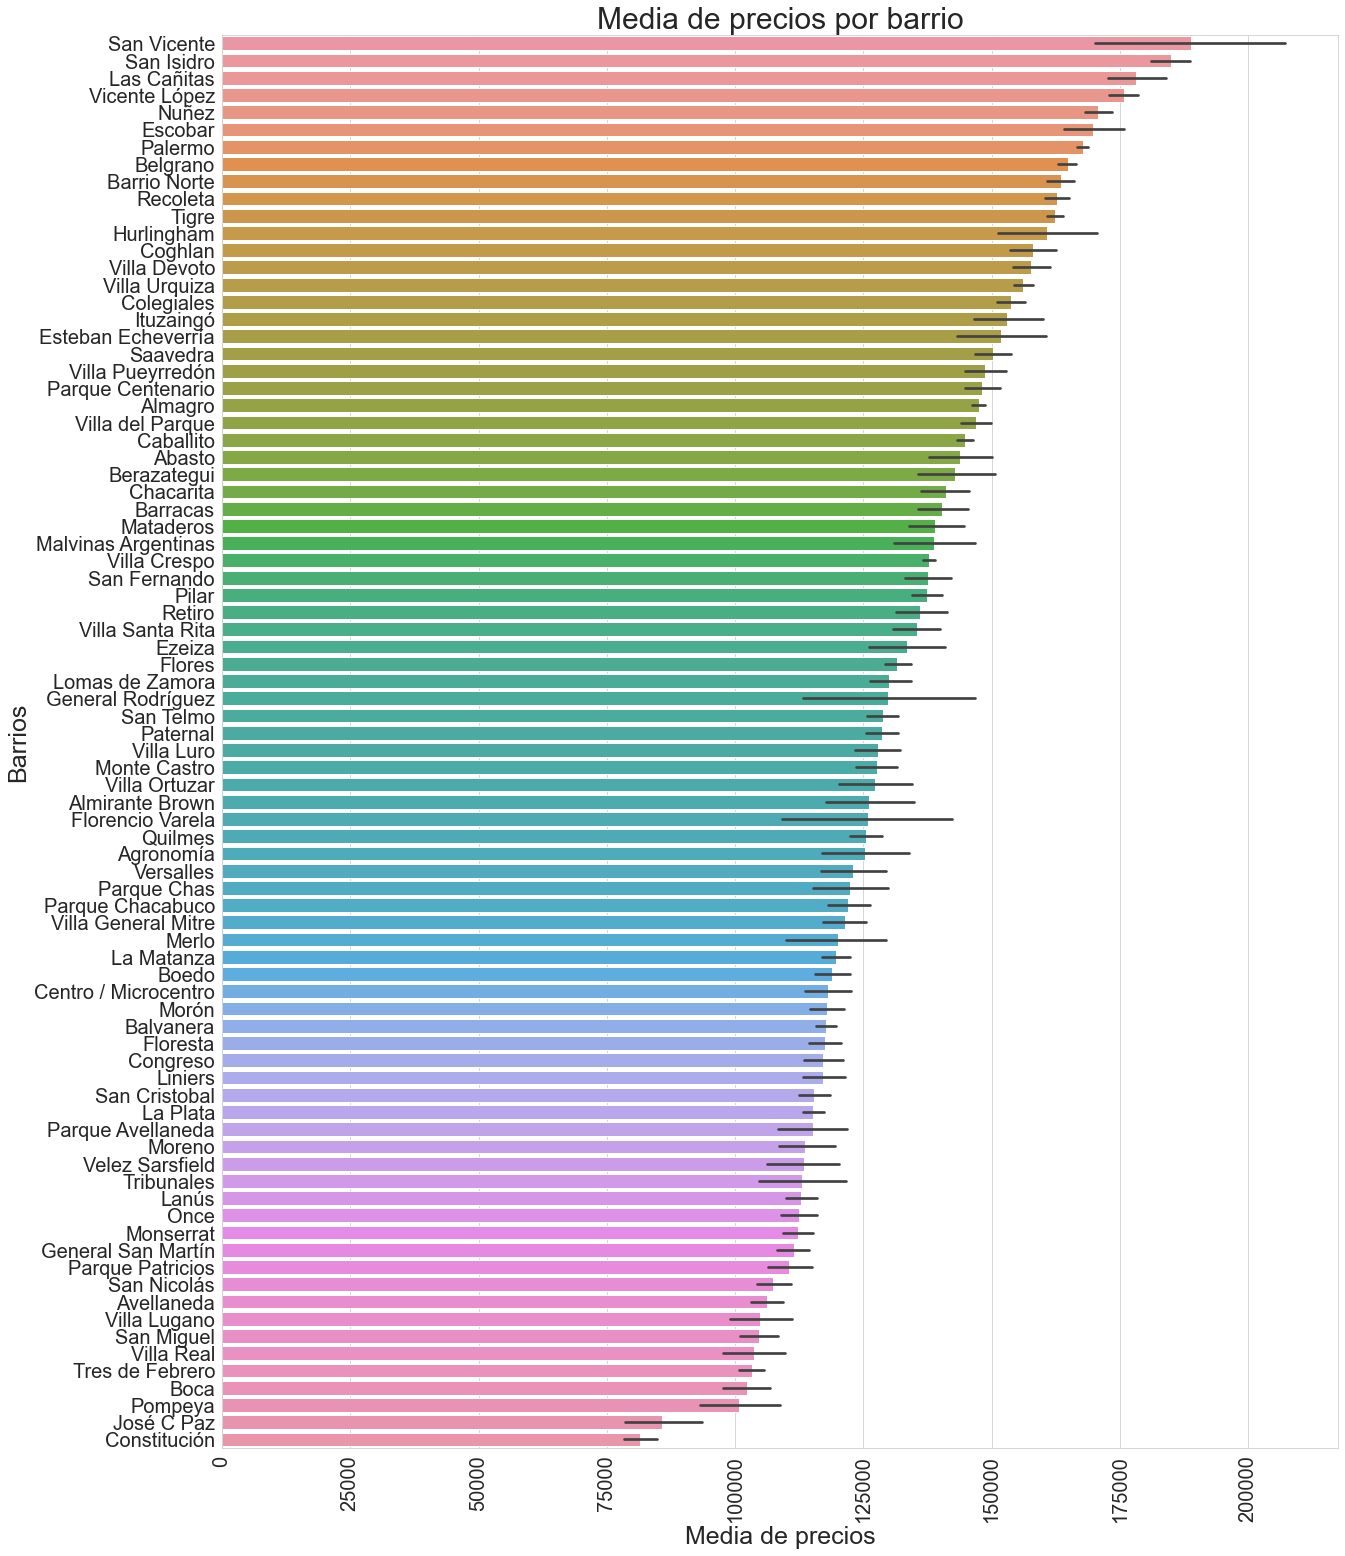

In [96]:
# Graficamos los barrios y la media de su precio para observar si hay barrios que sean mas caros que otros
plt.figure(figsize = (20,26))
plt.title('Media de precios por barrio', size=30)
sns.barplot(data=properati, y = 'barrio', x = 'price', order = properati.groupby(['barrio']).mean().sort_values(by='price', ascending=False)['price'].index)
plt.xlabel('Media de precios', size = 25)
plt.ylabel('Barrios', size = 25)
plt.xticks(rotation= 90, size=20)
plt.yticks(size = 20)
plt.show()

Podemos observar que el valor de venta de las propiedades varía segun el barrio

## 1.5 Análisis multivariado

Se realiza un análisis multivariado con los datos tratados para evaluar los resultados.

Comenzamos haciendo un mapa con la latitud, longitud y barrios para ver que tenga sentido la información del dataset, seguido de un mapa por el precio donde se puede ver las zonas más caras para comprar una propiedad

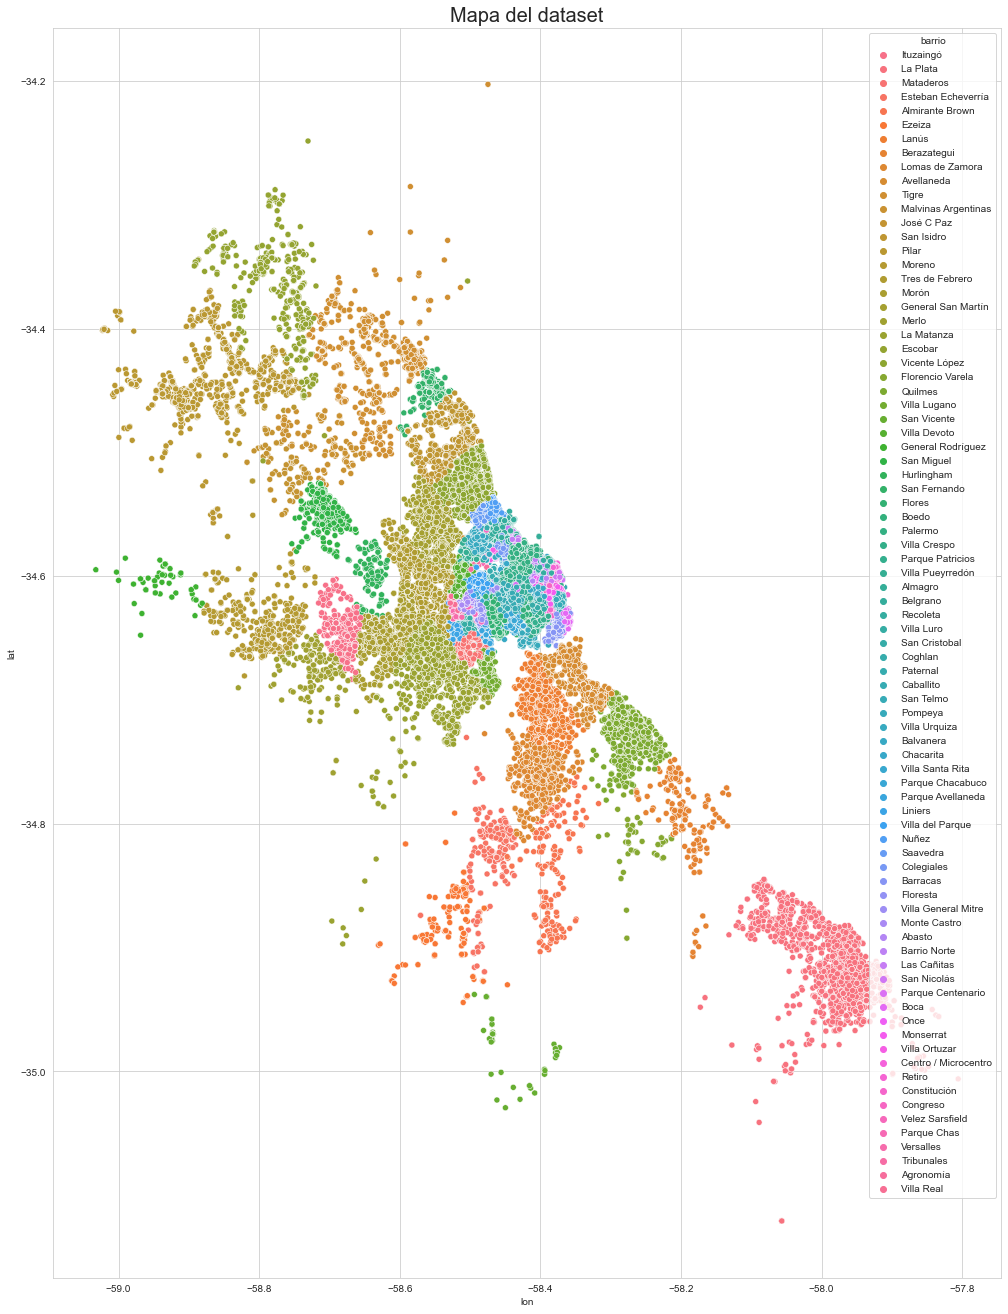

In [97]:
plt.rcParams['figure.figsize'] = (17, 23)
sns.scatterplot(x='lon', y='lat',data=properati,hue='barrio')
plt.title('Mapa del dataset', fontsize = 20)
plt.show()

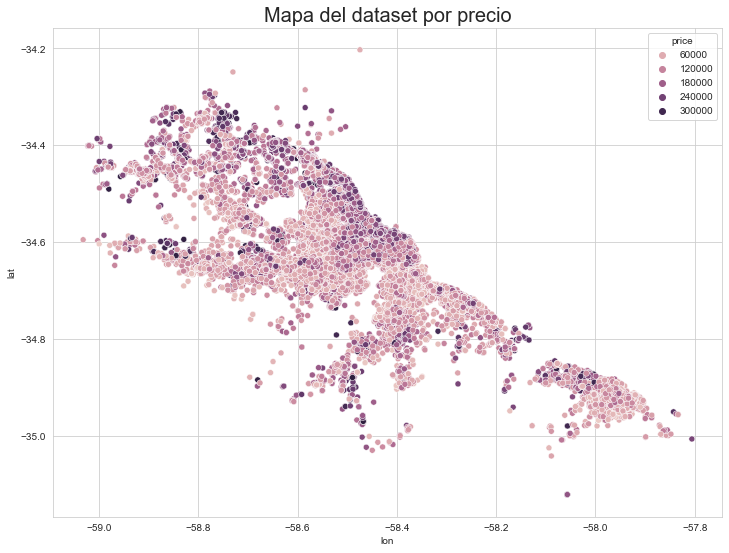

In [98]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.scatterplot(x='lon', y='lat',data=properati,hue='price')
plt.title('Mapa del dataset por precio', fontsize = 20)
plt.show()

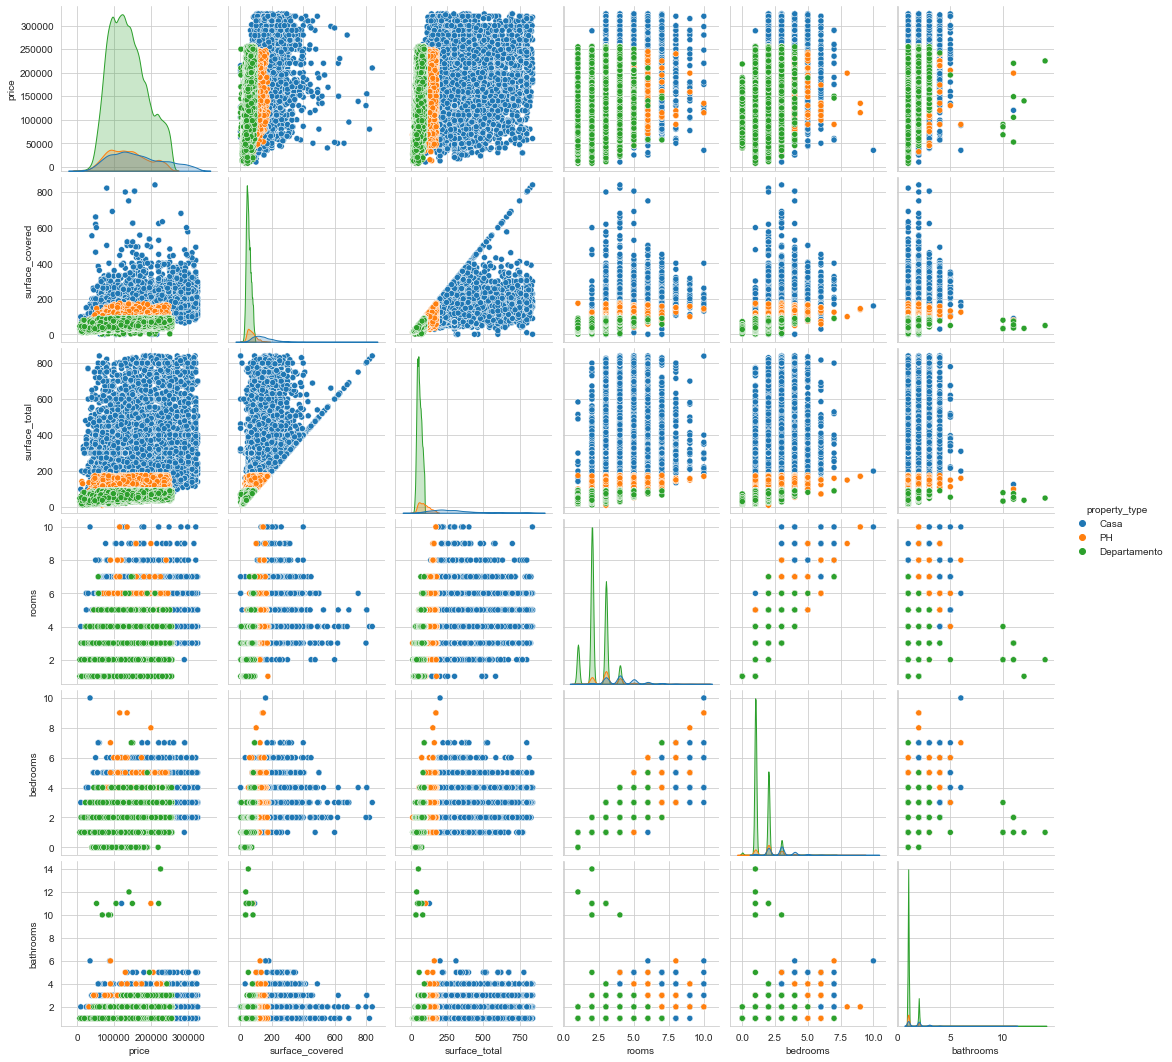

In [99]:
sns.pairplot(properati[['price','surface_covered','surface_total','rooms','bedrooms','bathrooms','property_type']], hue='property_type')

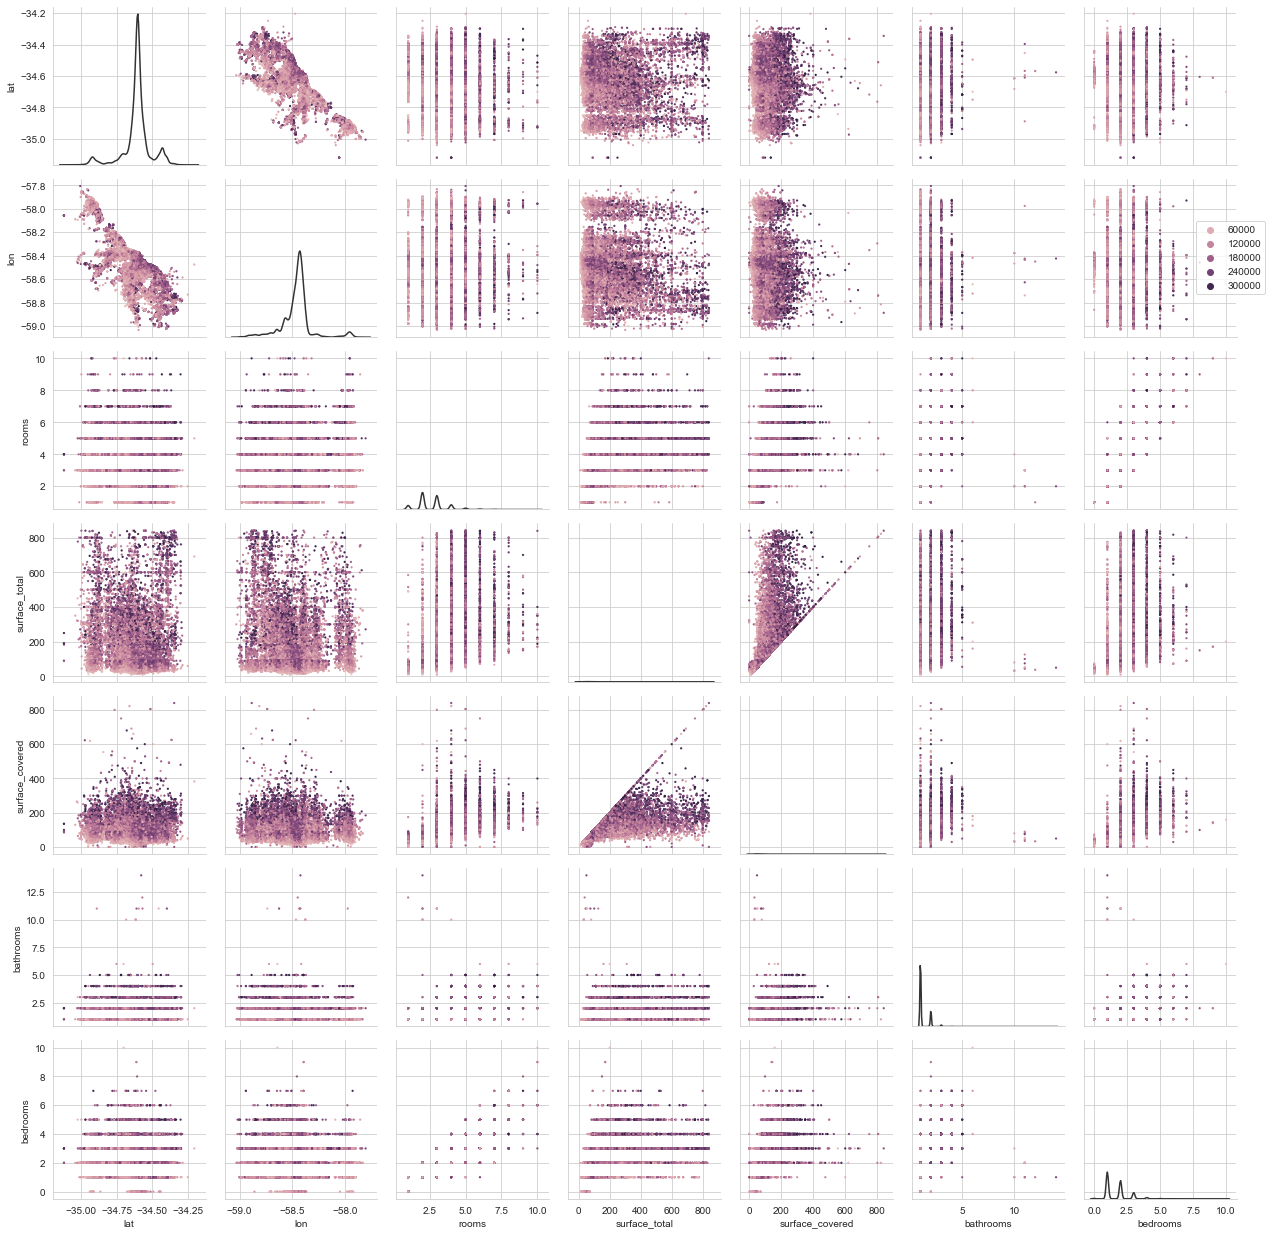

In [100]:
g = sns.PairGrid(properati, vars=["lat", "lon", "rooms","surface_total","surface_covered","bathrooms","bedrooms"])
g.map_diag(sns.kdeplot, color=".2")
g.map_offdiag(sns.scatterplot, hue=properati["price"], s=5, linewidth=0)
g.axes[1, -1].legend(loc="center left", bbox_to_anchor=(.7, .5))

Haciendo un pairplot discriminando los tipos de propiedad podemos notar que las casas no tienen tanta variación de precio pero si es el tipo de propiedad que más varia en las relaciones entre 2 variables
Posteriormente Hago un pairplot discriminando por precios para poder observar que hay zonas donde la relación entre 2 variables equivale a un mayor precio en las viviendas

## 1.6 Definicion de variables predictoras y target

El último paso será establecer las variables predictoras que se utilizarán para la realización de los modelos, estas son:
- 'barrios'
- 'surface_total'
- 'surface_covered'
- 'rooms'
- 'bedrooms'
- 'bathrooms'

La variable target es: 'price'

In [101]:
dep = dep.drop([ 'start_date', 'end_date', 'created_on', 'title', 'description', 'provincia'], axis=1) 
ph = ph.drop([ 'start_date', 'end_date', 'created_on', 'title', 'description', 'provincia'], axis=1) 
casa = casa.drop([ 'start_date', 'end_date', 'created_on', 'title', 'description', 'provincia'], axis=1) 

In [102]:
properati = pd.concat([casa,ph,dep])
properati.shape

(73934, 10)

In [103]:
properati.to_csv('properati_dataset.csv')

Con este paso damos por finalizado el data wrangling del proyecto, el dataset obtenido de estos cambios se busco que sea consistente y se encuentre listo para ser utilizado para lograr el objetivo del proyecto con modelos de machine learning